In [62]:
import pandas as pd, numpy as np, seaborn as sns, matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz, plot_tree
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, mean_squared_error as MSE, roc_auc_score
from sklearn.ensemble import AdaBoostClassifier, AdaBoostRegressor, GradientBoostingRegressor, GradientBoostingClassifier, BaggingClassifier, VotingClassifier, RandomForestRegressor, RandomForestClassifier

sns.set()

In [ ]:
print(breast.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

* 0 เป็น malgnant
* 1 เป็น benign

จากในชุดข้อมูลนะ บอกว่า 

* 212 - Malignant, 
* 357 - Benign 

ตรวจสอบแล้ว ตรงกันทั้งใน kaggle และ sklearn

แต่ทำไมแบบฝึกหัดบอกตรงกันข้าม ?  ==> มันสลับค่าจาก 0 เป็น 1 จาก 1 เป็น 0 เพื่ออะไร????

In [ ]:
print(df['diagnosis'].value_counts())

1    357
0    212
Name: diagnosis, dtype: int64


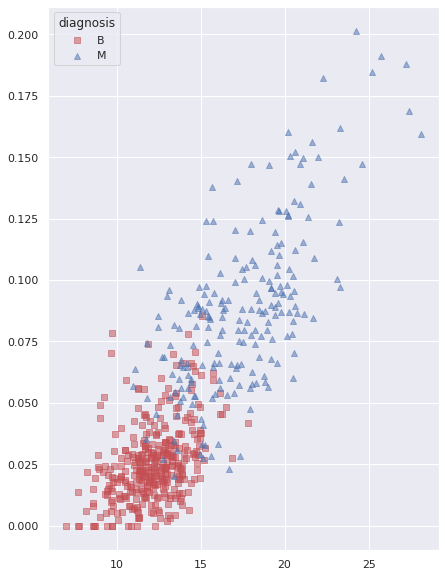

In [ ]:
from sklearn.datasets import load_breast_cancer
breast = load_breast_cancer()
df1 = pd.DataFrame(data=breast.data, columns=list(breast.feature_names))
df2 = pd.DataFrame(data=breast.target, columns=['diagnosis'])
df = pd.concat([df1, df2], axis=1)
X0, X1, y = df['mean radius'], df['mean concave points'], breast.target
  
plt.figure(figsize=(7, 10))
plt.scatter(X0[y==1], X1[y==1], color='r', marker='s', label='B', alpha=0.5)
plt.scatter(X0[y==0], X1[y==0], color='b', marker='^', label='M', alpha=0.5)
plt.legend(title='diagnosis')
#sns.scatterplot(data=df, x='mean radius', y='mean concave points', hue='diagnosis', ax=ax, alpha=0.6)
plt.show()

# ***Decision-tree Diagram***

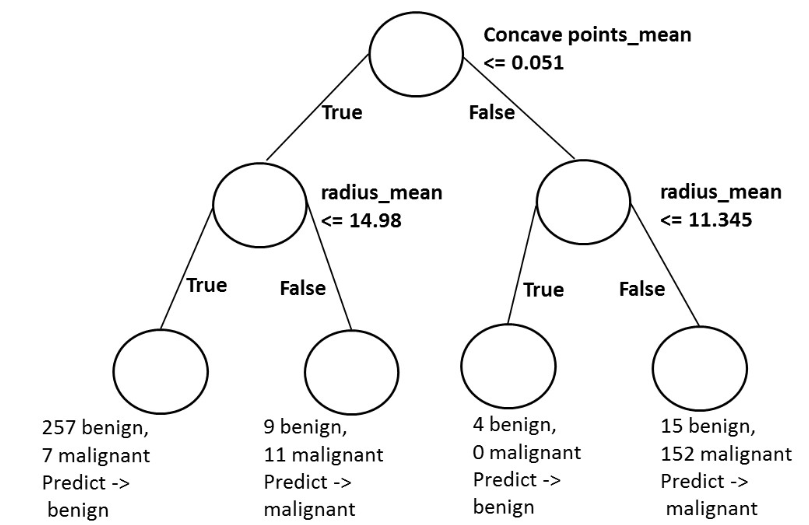

* `max_depth=2` คือ จำนวนสูงสุดของสาขาที่แตกออกมาจากอันบนสุด ?

In [ ]:
X_train, X_test, y_train, y_test= train_test_split(df[['mean radius', 'mean concave points']].values, y, test_size=0.2, stratify=y,random_state=1)
dt = DecisionTreeClassifier(max_depth=2, random_state=1)
dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)
accuracy_score(y_test, y_pred)

0.9035087719298246

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=9999)
lr.fit(X_train, y_train)

LogisticRegression(max_iter=9999)

## ***ฟังก์ชันเหล่านี้เอามาจากคอร์ส Linear Classifiers***

In [ ]:
def make_meshgrid(x, y, h=.02, lims=None):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """

    if lims is None:
        x_min, x_max = x.min() - 1, x.max() + 1
        y_min, y_max = y.min() - 1, y.max() + 1
    else:
        x_min, x_max, y_min, y_max = lims
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

def plot_classifier(X, y, clf, ax=None, ticks=False, proba=False, lims=None, title=None): # assumes classifier "clf" is already fit
    X0, X1 = X[:, 0], X[:, 1]
    xx, yy = make_meshgrid(X0, X1, lims=lims)

    if ax is None:
        plt.figure()
        ax = plt.gca()
        show = True
    else:
        show = False

    # can abstract some of this into a higher-level function for learners to call
    cs = plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8, proba=proba)
    if proba:
        cbar = plt.colorbar(cs)
        cbar.ax.set_ylabel('probability of red $\Delta$ class', fontsize=20, rotation=270, labelpad=30)
        cbar.ax.tick_params(labelsize=14)
    #ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=30, edgecolors='k', linewidth=1)
    labels = np.unique(y)
    if len(labels) == 2:
        ax.scatter(X0[y==labels[0]], X1[y==labels[0]], cmap=plt.cm.coolwarm, c='b', marker='^', edgecolors='k', label=labels[0])
        ax.scatter(X0[y==labels[1]], X1[y==labels[1]], cmap=plt.cm.coolwarm, c='r', marker='s', edgecolors='k', label=labels[1])
    else:
        ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=50, edgecolors='k', linewidth=1)

    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(0, 0.2)
    ax.legend()
    ax.set_title(title)
#     ax.set_xlabel(data.feature_names[0])
#     ax.set_ylabel(data.feature_names[1])
    if ticks:
        ax.set_xticks(())
        ax.set_yticks(())
#     ax.set_title(title)
    if show:
        plt.show()
    else:
        return ax

def plot_contours(ax, clf, xx, yy, proba=False, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    if proba:
        Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,-1]
        Z = Z.reshape(xx.shape)
        out = ax.imshow(Z,extent=(np.min(xx), np.max(xx), np.min(yy), np.max(yy)), origin='lower', vmin=0, vmax=1, **params)
        ax.contour(xx, yy, Z, levels=[0.5])
    else:
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        out = ax.contourf(xx, yy, Z, **params)
    return out


## ***Labels ของสไลด์ไม่สอดคล้องกับ labels ในรูปบนของสไลด์ รูปล่างนี้ทำให้สอดคล้องกันแล้ว นั่นคือ ตรงกันกับรูปบน***

* รูปของ Decision Trees ไม่เหมือนเป๊ะกับรูปบนดาต้าแคมพ์ ไม่รู้เหมือนกัน

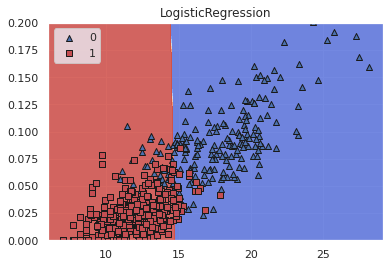

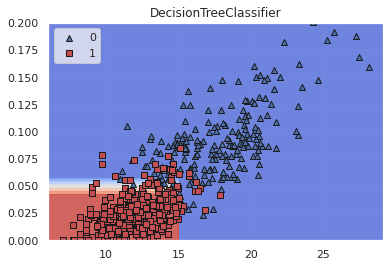

In [ ]:
XX = zip(df['mean radius'], df['mean concave points'])
XX = np.array(list(XX))
plot_classifier(XX, y, lr, title='LogisticRegression')
plt.show()
plot_classifier(XX, y, dt, title='DecisionTreeClassifier')
plt.show()

* Classification trees produces **rectangular-decision** regions in the feature-space.
* This is becuse at each split made by the trees only one feature involves.

### ***Train your first classification tree***

In this exercise you'll work with the Wisconsin [Breast Cancer Dataset](https://www.kaggle.com/uciml/breast-cancer-wisconsin-data) from the UCI machine learning repository. You'll predict whether a tumor is malignant or benign based on two features: the **mean radius** of the tumor (`radius_mean`) and its **mean number of concave points** (`concave points_mean`).

   * ### ***โจทย์บนดาต้าแคมพ์ สลับค่า 1 กับ 0 ดังนั้น ในแบบฝึกหัด เราก็จะสลับด้วย***

The dataset is already loaded in your workspace and is split into 80% train and 20% test. The feature matrices are assigned to `X_train` and `X_test`, while the arrays of labels are assigned to `y_train` and `y_test` where 
* class `1` corresponds to a malignant tumor and 
* class `0` corresponds to a benign tumor. To obtain reproducible results, we also defined a variable called `SEED` which is set to 1.


* Instantiate a **`DecisionTreeClassifier`** `dt` of maximum depth equal to `6`.

* Fit `dt` to the training set.

* Predict the test set labels and assign the result to `y_pred`.

In [ ]:
from sklearn.tree import DecisionTreeClassifier

df = pd.read_csv('data.csv')
X = df[['radius_mean', 'concave points_mean']]
y = df['diagnosis'].apply(lambda x: 1 if x == 'M' else 0) # สลับค่าให้เหมือนแบบฝึกหัด
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y,random_state=1)
SEED = 1

# Instantiate a DecisionTreeClassifier 'dt' with a maximum depth of 6
dt = DecisionTreeClassifier(max_depth=6, random_state=SEED)

# Fit dt to the training set
dt.fit(X_train, y_train)

# Predict test set labels
y_pred = dt.predict(X_test)
print(y_pred[0:5])


[0 0 0 1 0]


You've just trained your first classification tree! You can see the first five predictions made by the fitted tree on the test set in the console. In the next exercise, you'll evaluate the tree's performance on the entire test set.

### ***Evaluate the classification tree***

Now that you've fit your first classification tree, it's time to evaluate its performance on the test set. You'll do so using the accuracy metric which corresponds to the fraction of correct predictions made on the test set.

The trained model `dt` from the previous exercise is loaded in your workspace along with the test set features matrix `X_test` and the array of labels `y_test`.

* Predict the test set labels and assign the obtained array to `y_pred`.

* Evaluate the test set accuracy score of `dt` by calling **`accuracy_score()`** and assign the value to `acc`.


In [ ]:
# Import accuracy_score
from sklearn.metrics import accuracy_score

# Predict test set labels
y_pred = dt.predict(X_test)

# Compute test set accuracy  
acc = accuracy_score(y_test, y_pred)
print("Test set accuracy: {:.2f}".format(acc))

Test set accuracy: 0.89


Using only two features, your tree was able to achieve an accuracy of 89%!

### ***Logistic regression vs classification tree***

A classification tree divides the feature space into ***rectangular regions***. In contrast, a linear model such as logistic regression produces only a single linear decision boundary dividing the feature space into ***two decision regions***.

We have written a custom function called `plot_labeled_decision_regions()` that you can use to plot the decision regions of a list containing two trained classifiers. You can type `help(plot_labeled_decision_regions)` in the IPython shell to learn more about this function.

X_train, X_test, y_train, y_test, the model dt that you've trained in an earlier exercise , as well as the function plot_labeled_decision_regions() are available in your workspace.

* Instantiate a **`LogisticRegression`** model and assign it to `logreg`.

* Fit `logreg` to the training set.

* Review the plot generated by `plot_labeled_decision_regions()`.

In [ ]:
def plot_labeled_decision_regions(X,y, models):    
    '''
    Function producing a scatter plot of the instances contained 
    in the 2D dataset (X,y) along with the decision 
    regions of two trained classification models contained in the
    list 'models'.
            
    Parameters
    ----------
    X: pandas DataFrame corresponding to two numerical features 
    y: pandas Series corresponding the class labels
    models: list containing two trained classifiers 
    
    '''
    if len(models) != 2:
        raise Exception('''
        Models should be a list containing only two trained classifiers.
        ''')
    if not isinstance(X, pd.DataFrame):
        raise Exception('''
        X has to be a pandas DataFrame with two numerical features.
        ''')
    if not isinstance(y, pd.Series):
        raise Exception('''
        y has to be a pandas Series corresponding to the labels.
        ''')
    fig, ax = plt.subplots(1, 2, figsize=(12,7), sharey=True)
    for i, model in enumerate(models):
        plot_decision_regions(X.values,y.values, model, legend= 2, ax = ax[i])
        ax[i].set_title(model.__class__.__name__)
        ax[i].set_xlabel(X.columns[0])
        if i == 0:
            ax[i].set_ylabel(X.columns[1])
        ax[i].set_ylim(X.values[:,1].min(), X.values[:,1].max())
        ax[i].set_xlim(X.values[:,0].min(), X.values[:,0].max())
    plt.tight_layout()
    plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


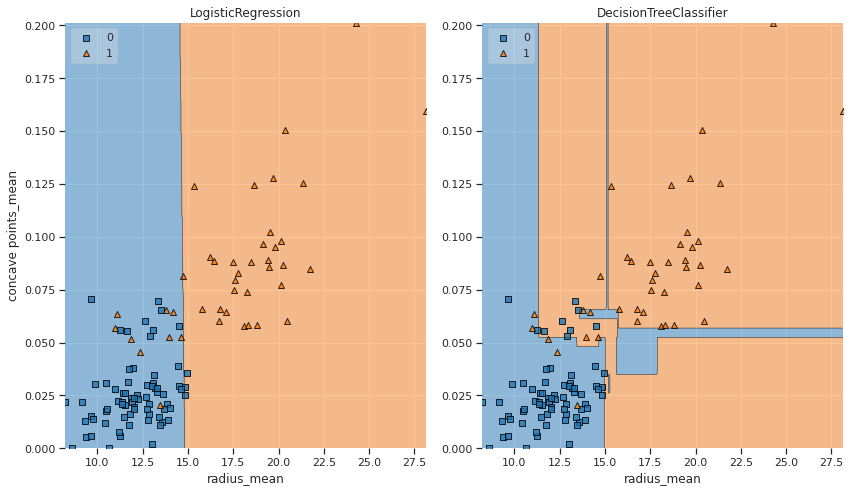

In [ ]:
# Import LogisticRegression from sklearn.linear_model
from mlxtend.plotting import plot_decision_regions
from sklearn.linear_model import  LogisticRegression

# Instatiate logreg
logreg = LogisticRegression(random_state=1)

# Fit logreg to the training set
logreg.fit(X_train, y_train)

# Define a list called clfs containing the two classifiers logreg and dt
clfs = [logreg, dt]

# Review the decision regions of the two classifiers
plot_labeled_decision_regions(X_test, y_test, clfs)

Notice how the decision boundary produced by logistic regression is linear while the boundaries produced by the classification tree divide the feature space into rectangular regions.

# ***Decsion Tree Prediction***

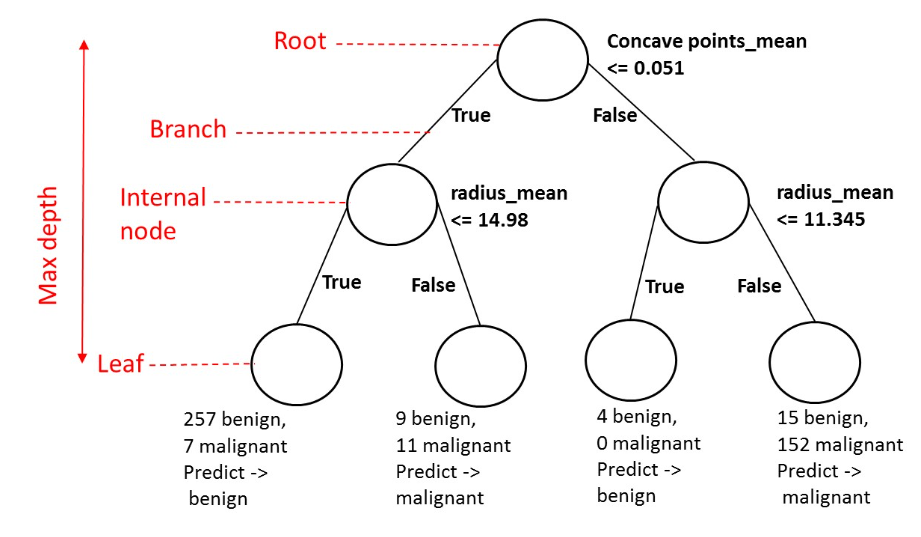

# ***Decision Tree Using `graphviz`***

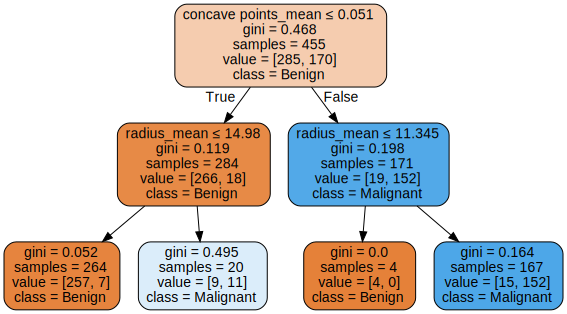

In [ ]:
import graphviz
from sklearn.tree import export_graphviz

dt = DecisionTreeClassifier(max_depth=2, random_state=1)
dt.fit(X_train, y_train)

tree_graph = export_graphviz(dt, out_file=None,
                                  feature_names=list(X.columns),
                                  filled=True, rounded=True,
                                  special_characters=True, 
                                  class_names=['Benign', 'Malignant']) #Names of each of the target classes in ascending numerical order. 
display(graphviz.Source(tree_graph))

[Text(0.5, 0.8333333333333334, 'concave points_mean <= 0.051\ngini = 0.468\nsamples = 455\nvalue = [285, 170]\nclass = Benign'),
 Text(0.25, 0.5, 'radius_mean <= 14.98\ngini = 0.119\nsamples = 284\nvalue = [266, 18]\nclass = Benign'),
 Text(0.125, 0.16666666666666666, 'gini = 0.052\nsamples = 264\nvalue = [257, 7]\nclass = Benign'),
 Text(0.375, 0.16666666666666666, 'gini = 0.495\nsamples = 20\nvalue = [9, 11]\nclass = Malignant'),
 Text(0.75, 0.5, 'radius_mean <= 11.345\ngini = 0.198\nsamples = 171\nvalue = [19, 152]\nclass = Malignant'),
 Text(0.625, 0.16666666666666666, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]\nclass = Benign'),
 Text(0.875, 0.16666666666666666, 'gini = 0.164\nsamples = 167\nvalue = [15, 152]\nclass = Malignant')]

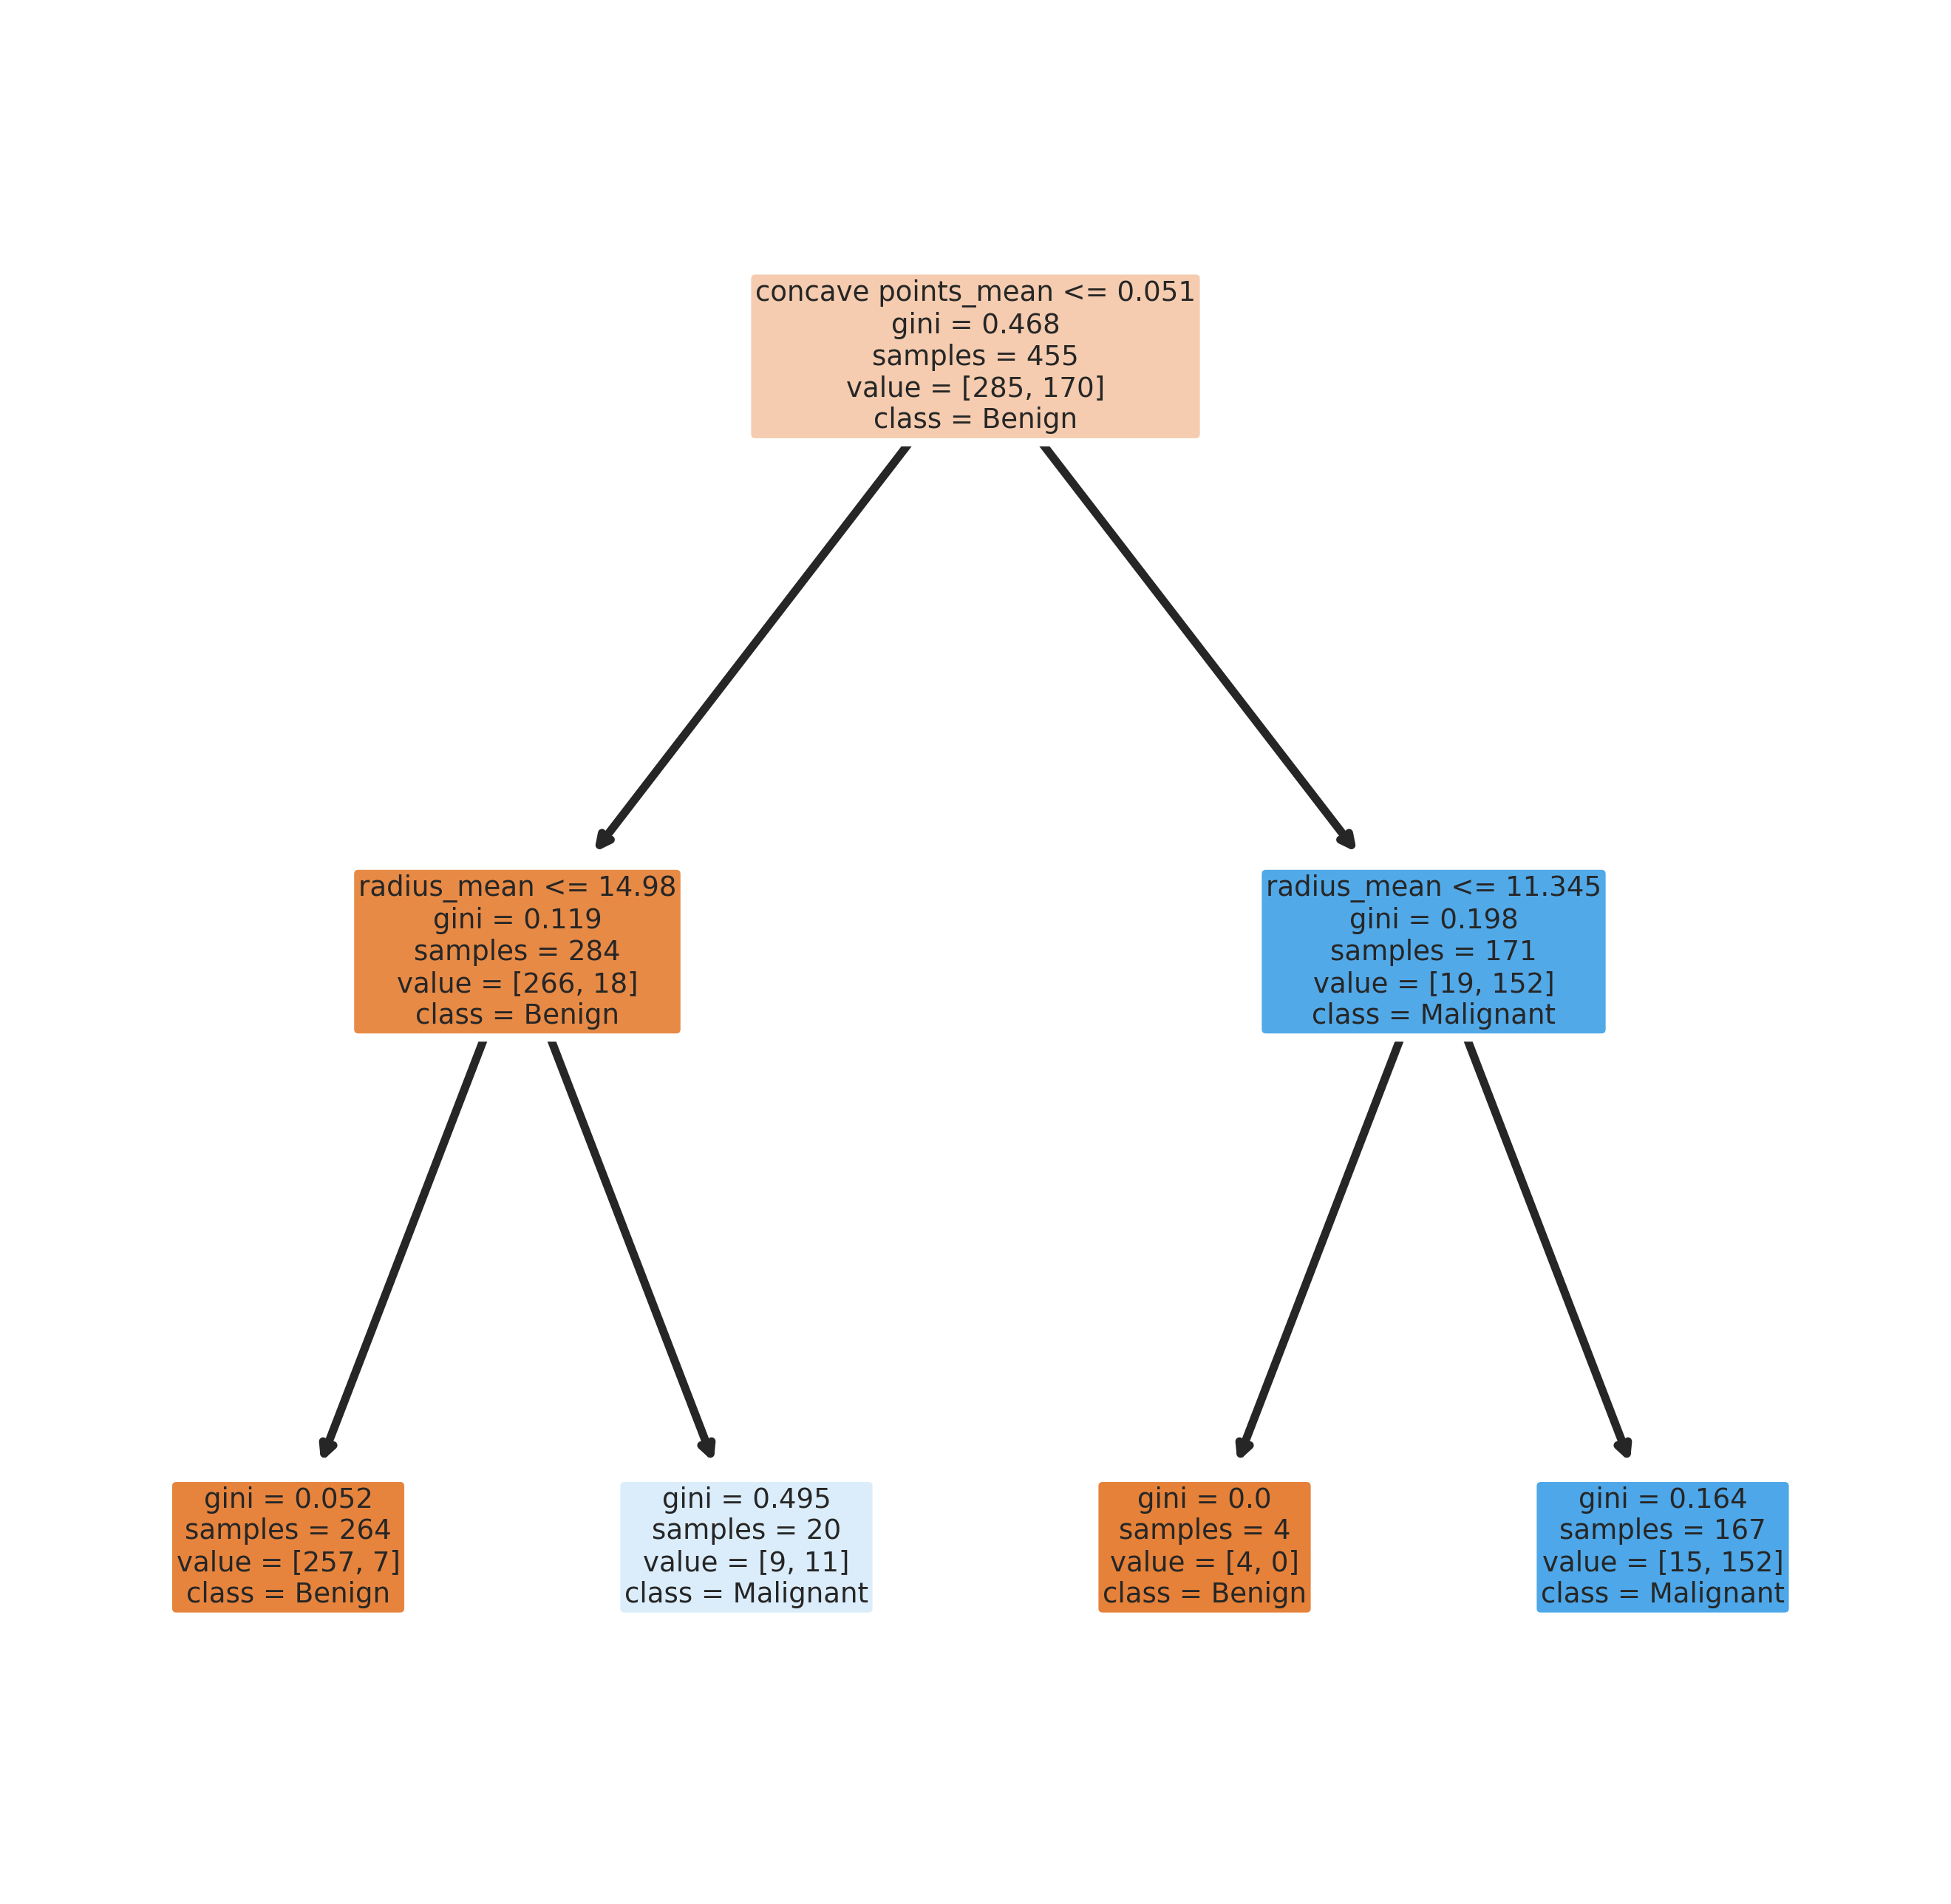

In [ ]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
plot_tree(dt,feature_names=X.columns, filled=True, rounded=True, class_names=['Benign', 'Malignant'])

### ***Using entropy as a criterion***

In this exercise, you'll train a classification tree on the Wisconsin Breast Cancer dataset using ***entropy*** as an information criterion. You'll do so using all the `30` features in the dataset, which is split into 80% train and 20% test.

`X_train` as well as the array of labels `y_train` are available in your workspace.

* Instantiate a **`DecisionTreeClassifier`** `dt_entropy` with a maximum depth of `8`.

* Set the information criterion to `'entropy'`.

* Fit `dt_entropy` on the training set.

In [ ]:
from sklearn.tree import DecisionTreeClassifier

df = pd.read_csv('data.csv').drop(columns='Unnamed: 32')
X = df.iloc[:, 2:]
y = df['diagnosis'].apply(lambda x: 1 if x == 'M' else 0) # สลับค่าให้เหมือนแบบฝึกหัด
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y,random_state=1)

# Import DecisionTreeClassifier from sklearn.tree
from sklearn.tree import DecisionTreeClassifier

# Instantiate dt_entropy, set 'entropy' as the information criterion
dt_entropy = DecisionTreeClassifier(max_depth=8, criterion='entropy', random_state=1)
dt_gini = DecisionTreeClassifier(max_depth=8, criterion='gini', random_state=1)

# Fit dt_entropy to the training set
dt_entropy.fit(X_train, y_train)
dt_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=8, random_state=1)

In the next exercise, you'll compare the accuracy of `dt_entropy` to the accuracy of a another tree trained using the gini-index as the information criterion.

### ***Entropy vs Gini index***

In this exercise you'll compare the test set accuracy of `dt_entropy` to the accuracy of another tree named `dt_gini`. The tree `dt_gini` was trained on the same dataset using the same parameters except for the information criterion which was set to the ***gini** index using the keyword `'gini'`.

* `X_test`, `y_test`, `dt_entropy`, as well as `accuracy_gini` which corresponds to the test set accuracy achieved by `dt_gini` are available in your workspace.


* Predict the test set labels of `dt_entropy` and assign the result to `y_pred`.
* Evaluate the test set accuracy of `dt_entropy` and assign the result to `accuracy_entropy`.
* Review `accuracy_entropy` and `accuracy_gini`.

In [ ]:
# Import accuracy_score from sklearn.metrics
from sklearn.metrics import accuracy_score

# Use dt_entropy to predict test set labels
y_pred_en = dt_entropy.predict(X_test)
y_pred_gi = dt_gini.predict(X_test)
# Evaluate accuracy_entropy
accuracy_entropy = accuracy_score(y_test, y_pred_en)
accuracy_gini = accuracy_score(y_test, y_pred_gi)

# Print accuracy_entropy
print(f'Accuracy achieved by using entropy: {accuracy_entropy}')

# Print accuracy_gini
print(f'Accuracy achieved by using the gini index: {accuracy_gini}')

Accuracy achieved by using entropy: 0.9298245614035088
Accuracy achieved by using the gini index: 0.9298245614035088


Most of the time, the **gini** index and **entropy** lead to the same results. The **gini** index is slightly faster to compute and is the default criterion used in the **`DecisionTreeClassifier`** model of scikit-learn.

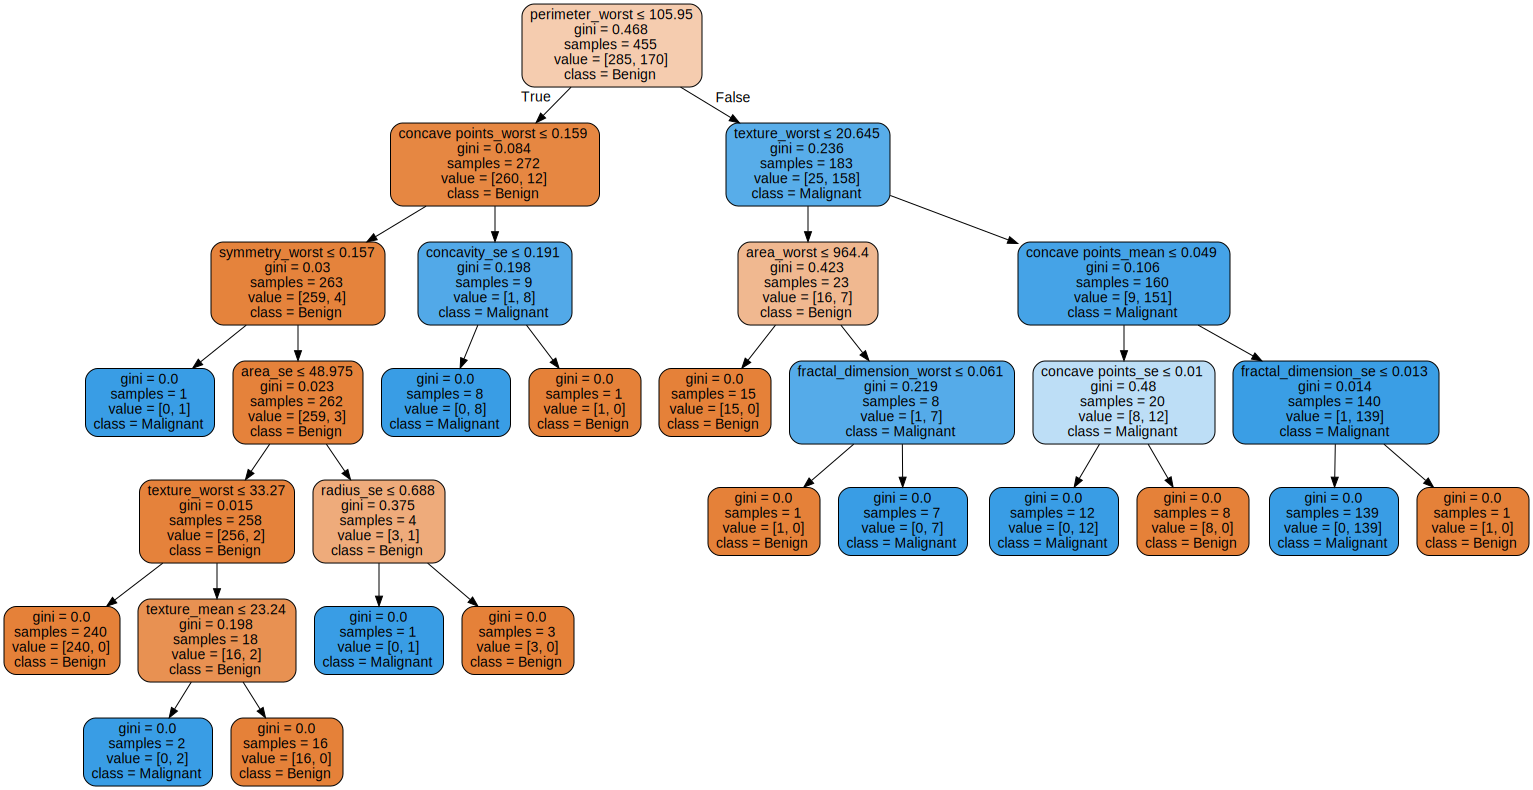

In [ ]:
import graphviz
from sklearn.tree import export_graphviz
tree_graph = export_graphviz(dt_gini, out_file=None,
                                  feature_names=list(X.columns),
                                  filled=True, rounded=True,
                                  special_characters=True, 
                                  class_names=['Benign', 'Malignant'])
display(graphviz.Source(tree_graph))

[Text(0.4431818181818182, 0.9285714285714286, 'perimeter_worst <= 105.95\ngini = 0.468\nsamples = 455\nvalue = [285, 170]\nclass = Benign'),
 Text(0.22727272727272727, 0.7857142857142857, 'concave points_worst <= 0.159\ngini = 0.084\nsamples = 272\nvalue = [260, 12]\nclass = Benign'),
 Text(0.13636363636363635, 0.6428571428571429, 'symmetry_worst <= 0.157\ngini = 0.03\nsamples = 263\nvalue = [259, 4]\nclass = Benign'),
 Text(0.09090909090909091, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = Malignant'),
 Text(0.18181818181818182, 0.5, 'area_se <= 48.975\ngini = 0.023\nsamples = 262\nvalue = [259, 3]\nclass = Benign'),
 Text(0.09090909090909091, 0.35714285714285715, 'texture_worst <= 33.27\ngini = 0.015\nsamples = 258\nvalue = [256, 2]\nclass = Benign'),
 Text(0.045454545454545456, 0.21428571428571427, 'gini = 0.0\nsamples = 240\nvalue = [240, 0]\nclass = Benign'),
 Text(0.13636363636363635, 0.21428571428571427, 'texture_mean <= 23.24\ngini = 0.198\nsamples = 18\nvalue = [16, 2

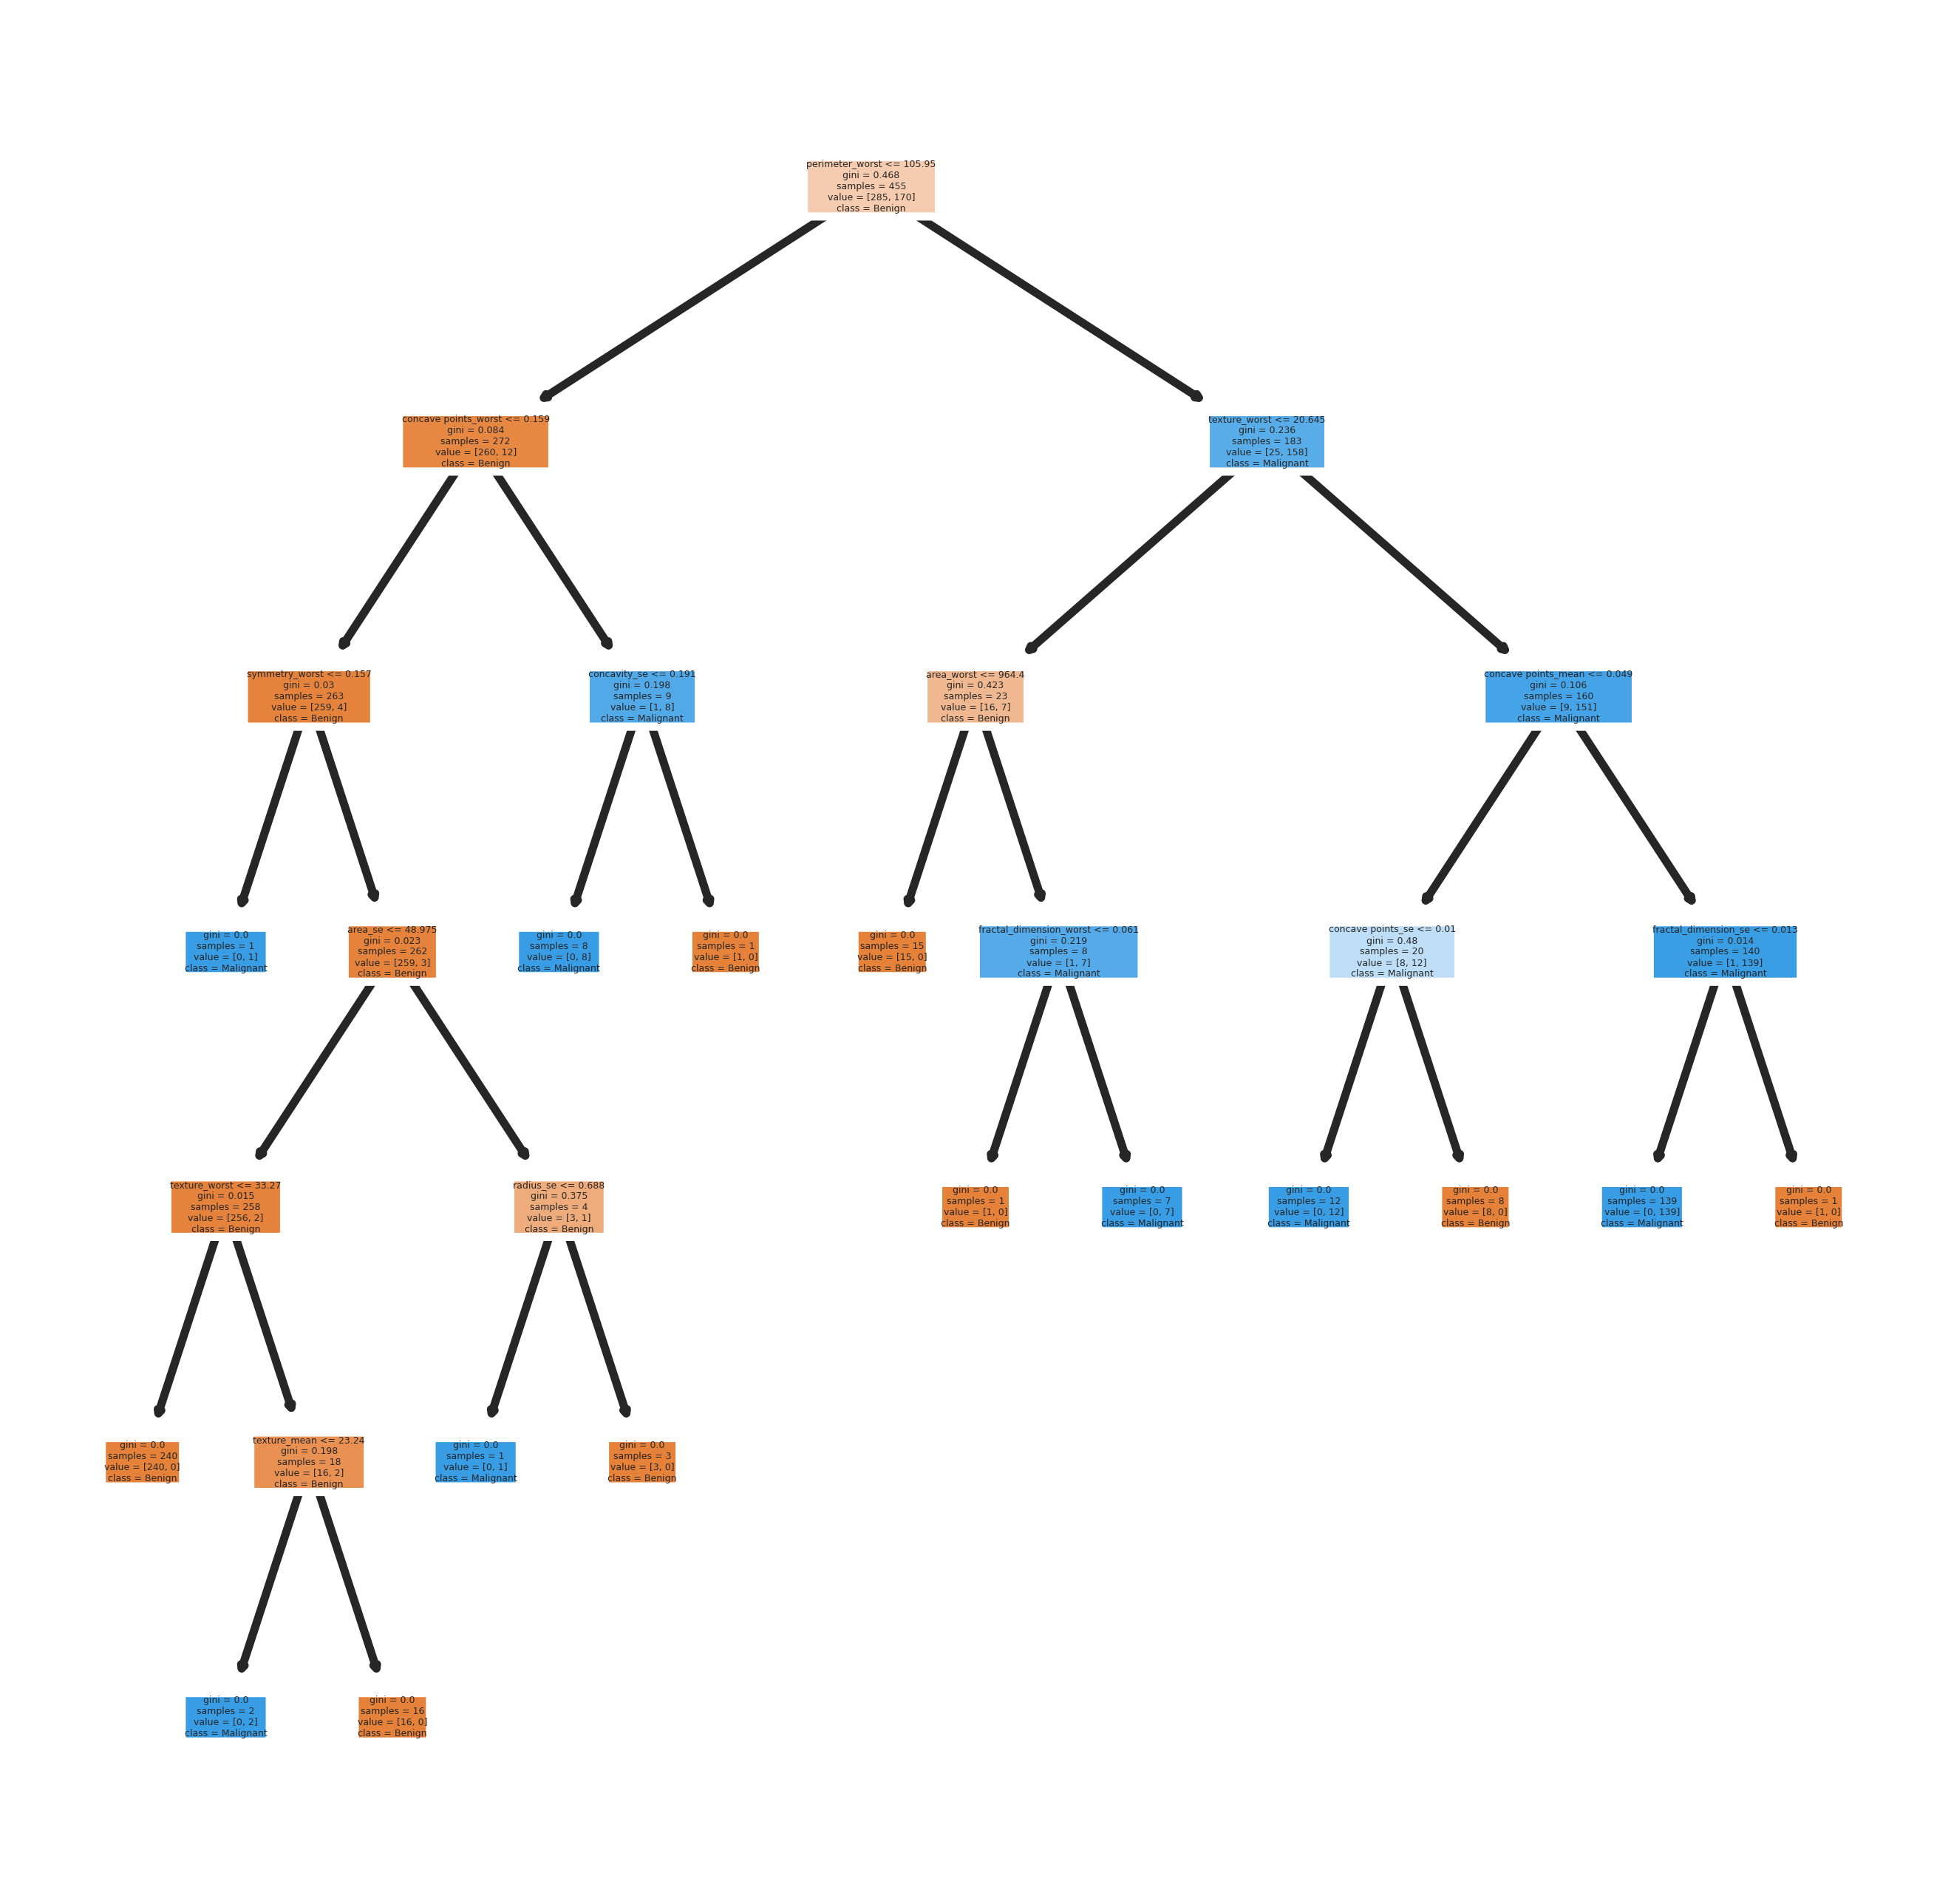

In [ ]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
plot_tree(dt_gini,feature_names=X.columns, filled=True, rounded=True, class_names=['Benign', 'Malignant'])

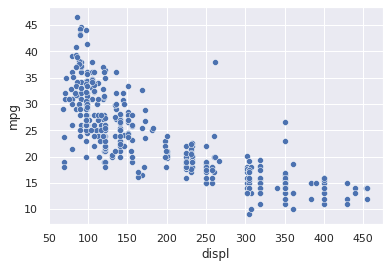

5.102306888903137


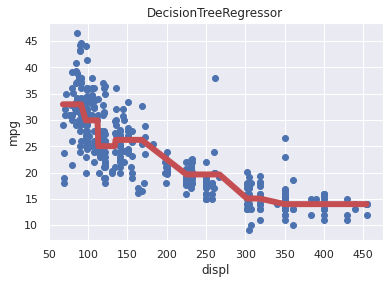

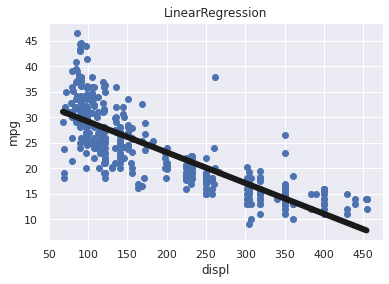

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE
from sklearn.linear_model import LinearRegression

df = pd.read_csv('auto.csv')
X, y = df[['displ']], df['mpg']
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=3)

dt = DecisionTreeRegressor(max_depth=4, min_samples_leaf=0.1, random_state=3)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
mse_dt = MSE(y_test, y_pred)

# Compute test-set RMSE
rmse_dt = mse_dt**(1/2)
# Print rmse_dt
sns.scatterplot(data=df, x='displ', y='mpg')
plt.show()
print(rmse_dt)
plt.scatter(df['displ'], df['mpg'])
plt.plot(X_test.sort_values('displ'), dt.predict(X_test.sort_values('displ')), c='r', linewidth=6)
plt.xlabel('displ')
plt.ylabel('mpg')
plt.title('DecisionTreeRegressor')
plt.show()

lr = LinearRegression()
lr.fit(X_train, y_train)
plt.scatter(df['displ'], df['mpg'])
plt.plot(X_test.sort_values('displ'), lr.predict(X_test.sort_values('displ')), c='k', linewidth=6)
plt.xlabel('displ')
plt.ylabel('mpg')
plt.title('LinearRegression')
plt.show()

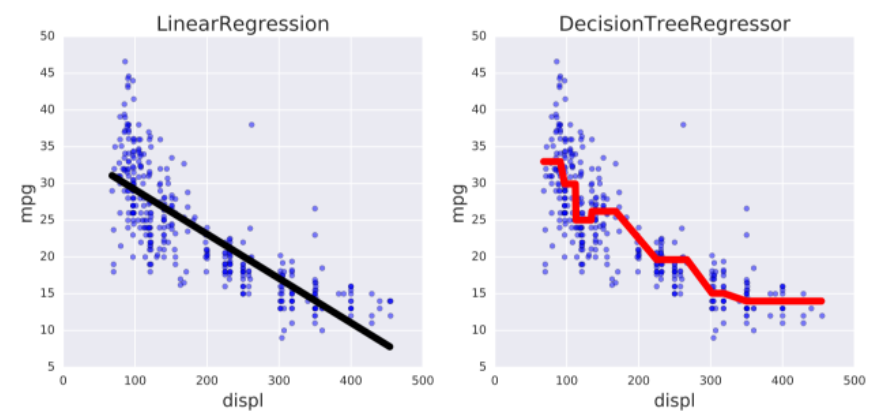

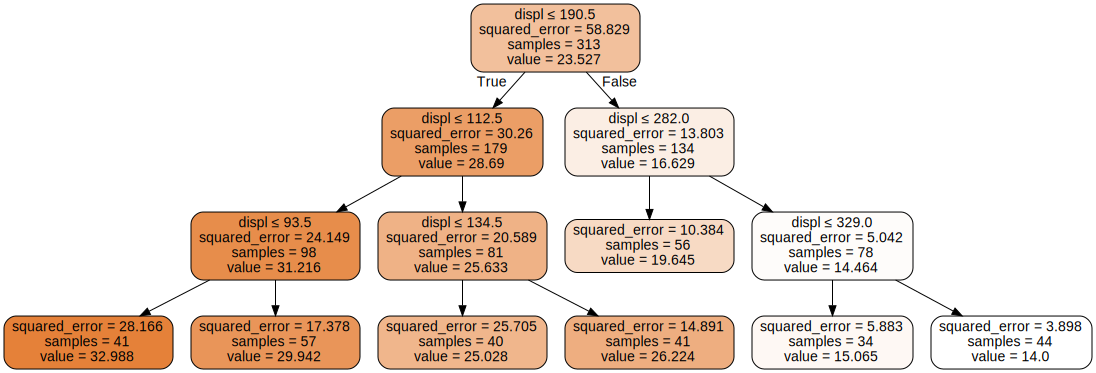

In [ ]:
import graphviz
from sklearn.tree import export_graphviz
tree_graph = export_graphviz(dt, out_file=None,
                                  feature_names=list(X.columns),
                                  filled=True, rounded=True,
                                  special_characters=True, 
                                  )
display(graphviz.Source(tree_graph))

[Text(0.5416666666666666, 0.875, 'displ <= 190.5\nsquared_error = 58.829\nsamples = 313\nvalue = 23.527'),
 Text(0.3333333333333333, 0.625, 'displ <= 112.5\nsquared_error = 30.26\nsamples = 179\nvalue = 28.69'),
 Text(0.16666666666666666, 0.375, 'displ <= 93.5\nsquared_error = 24.149\nsamples = 98\nvalue = 31.216'),
 Text(0.08333333333333333, 0.125, 'squared_error = 28.166\nsamples = 41\nvalue = 32.988'),
 Text(0.25, 0.125, 'squared_error = 17.378\nsamples = 57\nvalue = 29.942'),
 Text(0.5, 0.375, 'displ <= 134.5\nsquared_error = 20.589\nsamples = 81\nvalue = 25.633'),
 Text(0.4166666666666667, 0.125, 'squared_error = 25.705\nsamples = 40\nvalue = 25.028'),
 Text(0.5833333333333334, 0.125, 'squared_error = 14.891\nsamples = 41\nvalue = 26.224'),
 Text(0.75, 0.625, 'displ <= 282.0\nsquared_error = 13.803\nsamples = 134\nvalue = 16.629'),
 Text(0.6666666666666666, 0.375, 'squared_error = 10.384\nsamples = 56\nvalue = 19.645'),
 Text(0.8333333333333334, 0.375, 'displ <= 329.0\nsquared_err

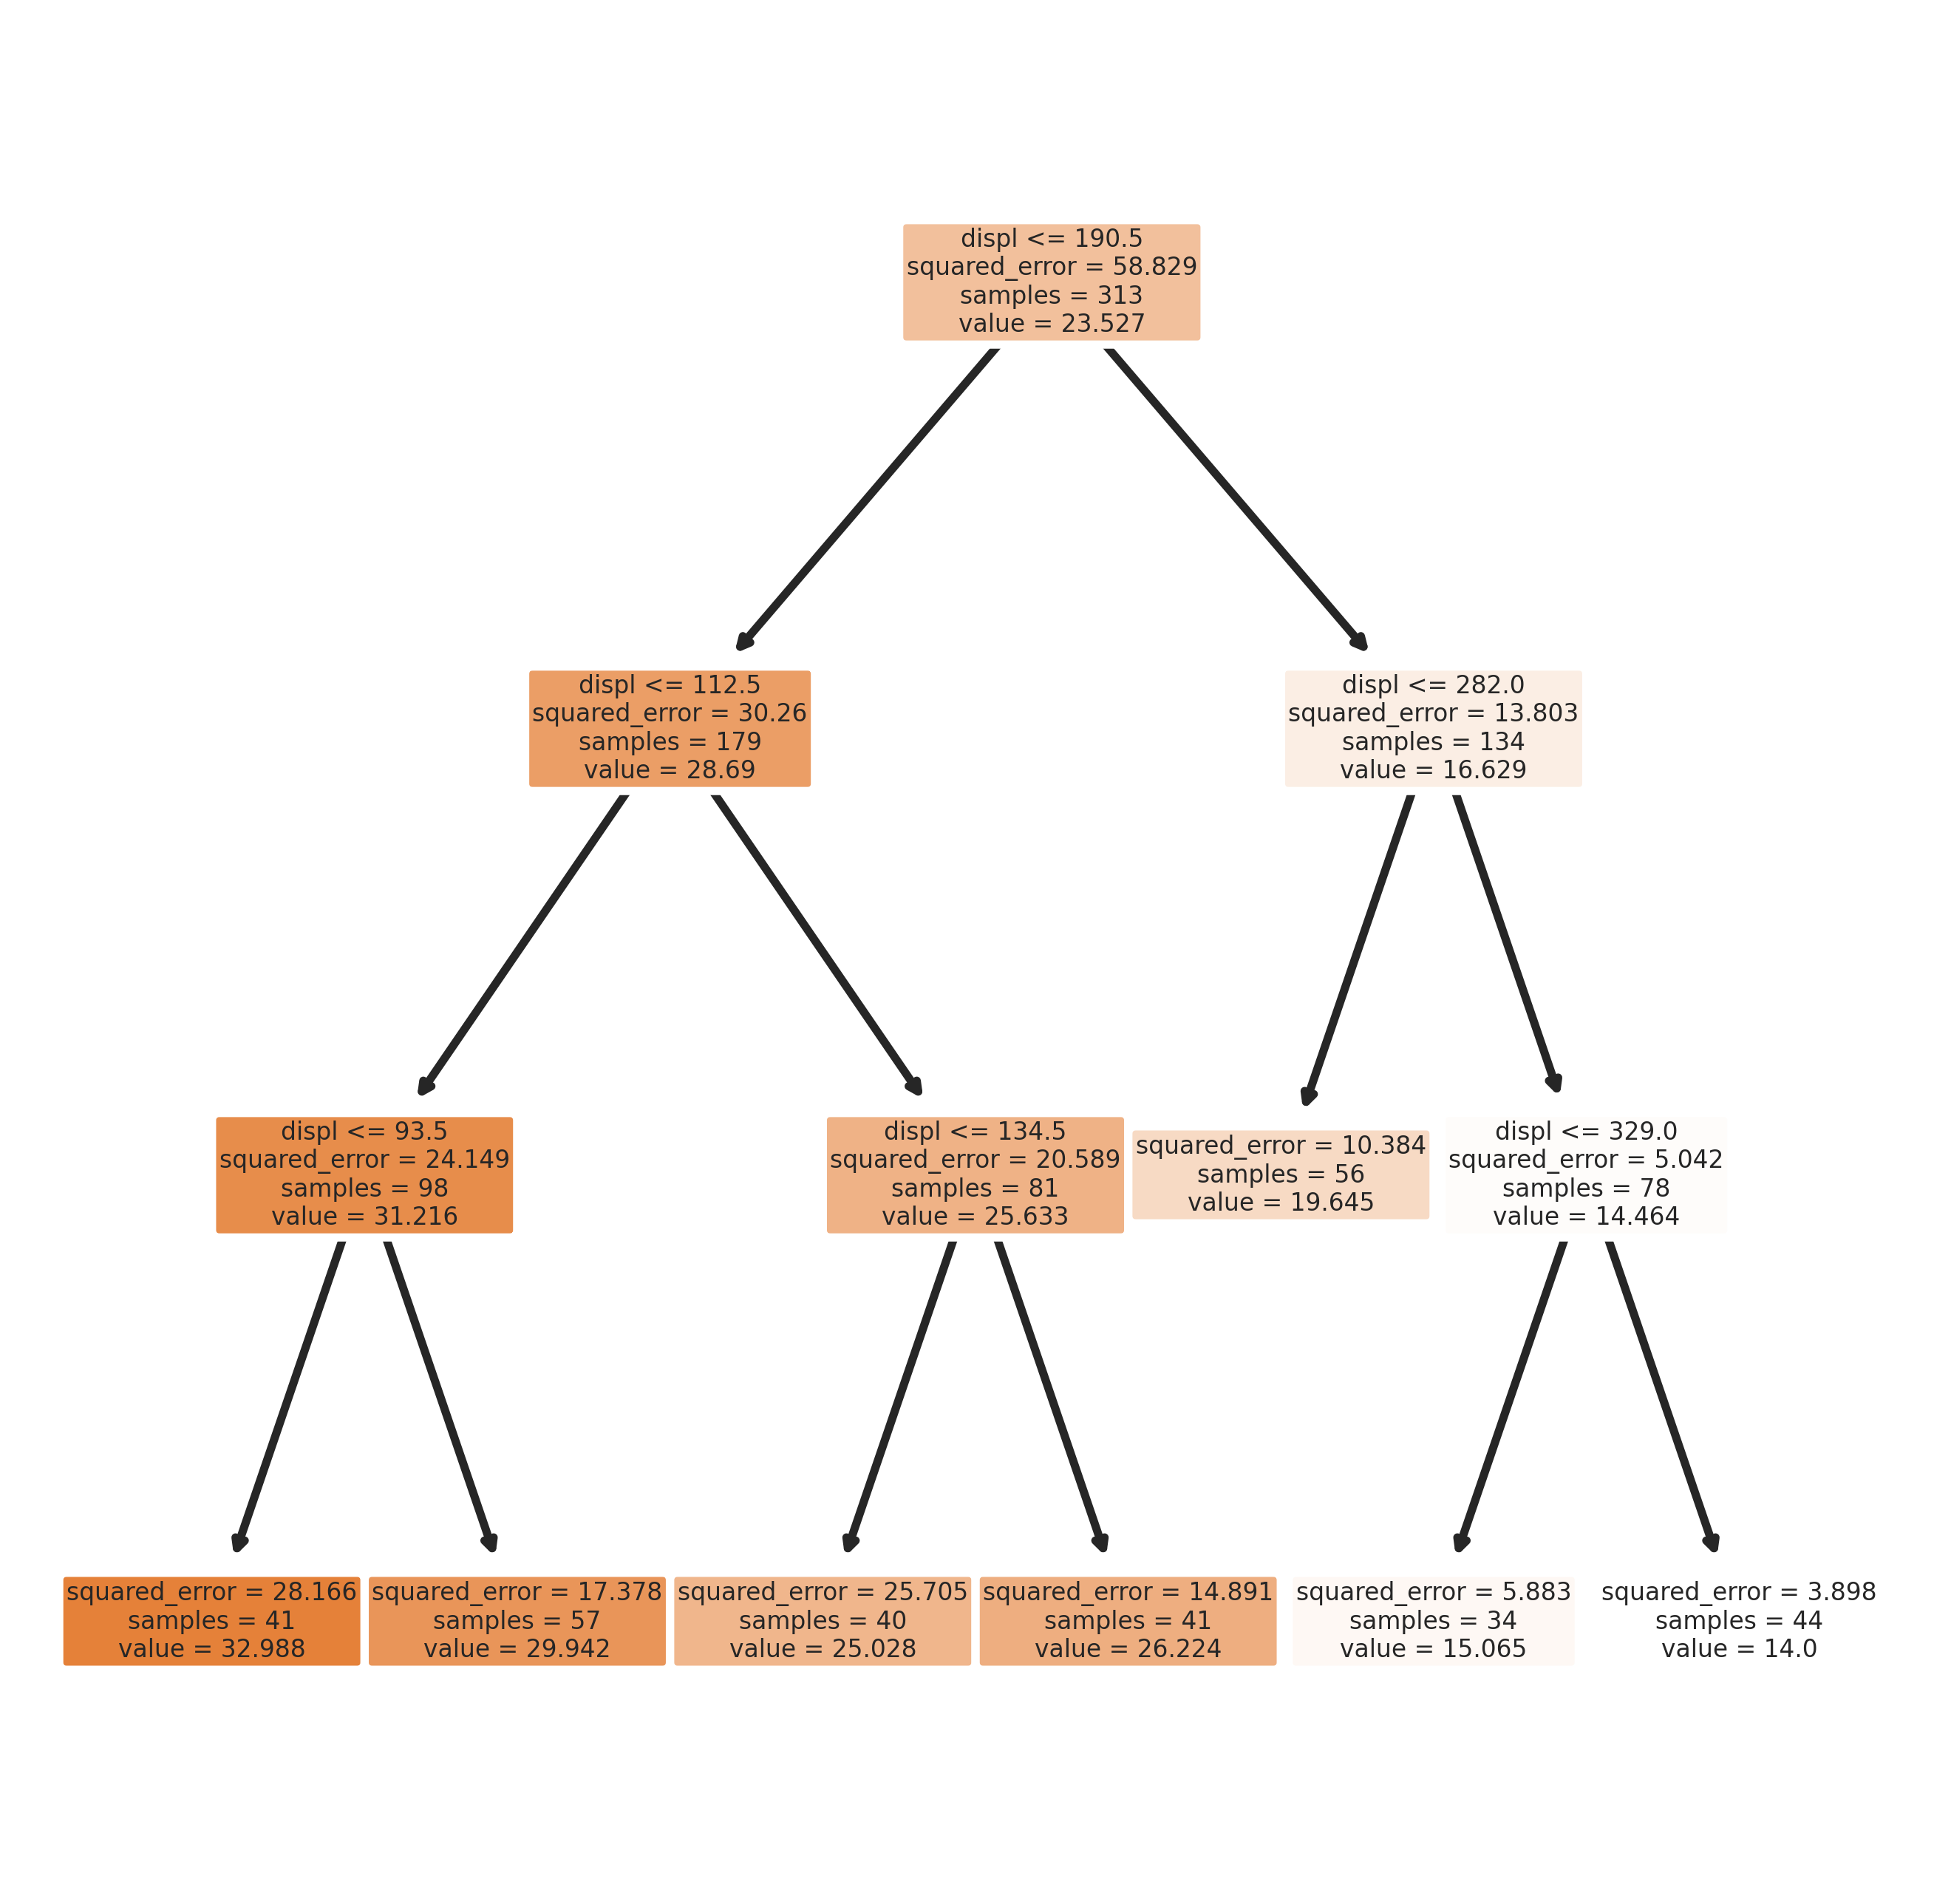

In [ ]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
plot_tree(dt,feature_names=X.columns, filled=True, rounded=True)

### ***Train your first regression tree***

In this exercise, you'll train a regression tree to predict the `mpg` (miles per gallon) consumption of cars in the [auto-mpg dataset](https://www.kaggle.com/uciml/autompg-dataset) using all the six available features.

The dataset is processed for you and is split to 80% train and 20% test. The features matrix `X_train` and the array `y_train` are available in your workspace.

* Instantiate a **`DecisionTreeRegressor`** `dt` with maximum depth `8` and `min_samples_leaf` set to `0.13`.
* Fit dt to the training set.

In [ ]:
# Import DecisionTreeRegressor from sklearn.tree
from sklearn.tree import DecisionTreeRegressor

df = pd.read_csv('auto.csv')
X, y = pd.get_dummies(df.drop(columns='mpg')), df['mpg']
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=3)

# Instantiate dt
dt = DecisionTreeRegressor(max_depth=8,
             min_samples_leaf=0.13,
            random_state=3)

# Fit dt to the training set
dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=8, min_samples_leaf=0.13, random_state=3)

### ***Evaluate the regression tree***

Evaluate the test set performance of `dt` using the Root Mean Squared Error (RMSE) metric. The RMSE of a model measures, on average, how much the model's predictions differ from the actual labels. The RMSE of a model can be obtained by computing the square root of the model's Mean Squared Error (MSE).

The features matrix `X_test`, the array `y_test`, as well as the decision tree regressor `dt` that you trained in the previous exercise are available in your workspace.

* Predict the test set labels and assign the output to `y_pred`.
* Compute the test set MSE by calling MSE and assign the result to `mse_dt`.
* Compute the test set RMSE and assign it to `rmse_dt`.

In [ ]:
# Import mean_squared_error from sklearn.metrics as MSE
from sklearn.metrics import mean_squared_error as MSE

# Compute y_pred
y_pred = dt.predict(X_test)

# Compute mse_dt
mse_dt = MSE(y_test, y_pred)

# Compute rmse_dt
rmse_dt = mse_dt**(1/2)

# Print rmse_dt
print("Test set RMSE of dt: {:.2f}".format(rmse_dt))

Test set RMSE of dt: 4.37


In the next exercise, you'll compare the test-set RMSE of dt to that of a linear regression model trained on the same dataset.

### ***Linear regression vs regression tree***

In this exercise, you'll compare the test set RMSE of dt to that achieved by a linear regression model. We have already instantiated a linear regression model `lr` and trained it on the same dataset as `dt`.

The features matrix `X_test`, the array of labels `y_test`, the trained linear regression model `lr`, `mean_squared_error` function which was imported under the alias `MSE` and `rmse_dt` from the previous exercise are available in your workspace.

* Predict test set labels using the linear regression model (`lr`) and assign the result to `y_pred_lr`.

* Compute the test set MSE and assign the result to `mse_lr`.

* Compute the test set RMSE and assign the result to `rmse_lr`.

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

# Predict test set labels 
y_pred_lr = lr.predict(X_test)

# Compute mse_lr
mse_lr = MSE(y_test, y_pred_lr)

# Compute rmse_lr
rmse_lr = mse_lr**(1/2)

# Print rmse_lr
print('Linear Regression test set RMSE: {:.2f}'.format(rmse_lr))

# Print rmse_dt
print('Regression Tree test set RMSE: {:.2f}'.format(rmse_dt))

Linear Regression test set RMSE: 5.10
Regression Tree test set RMSE: 4.37


# ***K-Fold CV in sklearn on the Auto Dataset***

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE
from sklearn.model_selection import cross_val_score

df = pd.read_csv('auto.csv')
X, y = pd.get_dummies(df.drop(columns='mpg')), df['mpg']

# Set seed for reproducibility
SEED = 123

# Split data into 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=SEED)

# Instantiate decision tree regressor and assign it to 'dt'
dt = DecisionTreeRegressor(max_depth=4, min_samples_leaf=0.14, random_state=SEED)

# Evaluate the list of MSE contained by 10-fold CV
# Set n_jobs to -1 in order to exploit all CPU cores in computation
MSE_CV = - cross_val_score(dt, X_train, y_train, cv= 10, scoring='neg_mean_squared_error', n_jobs = -1)

# Fit 'dt' to the training set
dt.fit(X_train, y_train)

# Predict the labels of training set
y_predict_train = dt.predict(X_train)

# Predict the labels of test set
y_predict_test = dt.predict(X_test)

# CV MSE
print('CV MSE: {:.2f}'.format(MSE_CV.mean()))

CV MSE: 20.51


In [ ]:
# Training set MSE
print('Train MSE: {:.2f}'.format(MSE(y_train, y_predict_train)))

Train MSE: 15.30


In [ ]:
# Test set MSE
print('Test MSE: {:.2f}'.format(MSE(y_test, y_predict_test)))

Test MSE: 20.92


### ***Instantiate the model***

Diagnose the bias and variance problems of a regression tree. The regression tree you'll define in this exercise will be used to predict the **mpg** consumption of cars from the auto dataset using all available features.

We have already processed the data and loaded the features matrix `X` and the array `y` in your workspace. In addition, the **`DecisionTreeRegressor`** class was imported from **`sklearn.tree`**.

* Split the data into 70% train and 30% test.
* Instantiate a **`DecisionTreeRegressor`** with `max_depth=4` and `min_samples_leaf=0.26`.

In [ ]:
from sklearn.model_selection import train_test_split

df = pd.read_csv('auto.csv')
X, y = pd.get_dummies(df.drop(columns='mpg')), df['mpg']

# Set SEED for reproducibility
SEED = 1

# Split the data into 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=SEED)

# Instantiate a DecisionTreeRegressor dt
dt = DecisionTreeRegressor(max_depth=4, min_samples_leaf=0.26, random_state=SEED)

### ***Evaluate the 10-fold CV error***

Evaluate the `10`-fold CV Root Mean Squared Error (RMSE) achieved by the regression tree `dt` that you instantiated in the previous exercise.

In addition to `dt`, the training data including `X_train` and `y_train` are available in your workspace. We also imported **`cross_val_score`** from **`sklearn.model_selection`**.

Note that since **`cross_val_score`** has only the option of evaluating the <ins>***negative***</ins> MSEs, its output should be <ins>***multiplied by negative one***</ins> to obtain the MSEs. The CV RMSE can then be obtained by computing the square root of the average MSE.

* Compute `dt`'s `10`-fold cross-validated MSE by setting the scoring argument to `'neg_mean_squared_error'`.

* Compute RMSE from the obtained MSE scores.

In [ ]:
# Compute the array containing the 10-folds CV MSEs
MSE_CV_scores = - cross_val_score(dt, X_train, y_train, cv=10, 
                                  scoring='neg_mean_squared_error', n_jobs=-1)

# Compute the 10-folds CV RMSE
RMSE_CV = (MSE_CV_scores.mean())**(1/2)

# Print RMSE_CV
print('CV RMSE: {:.2f}'.format(RMSE_CV))

CV RMSE: 5.14


A very good practice is to keep the test set untouched until you are confident about your model's performance. CV is a great technique to get an estimate of a model's performance without affecting the test set.

### ***Evaluate the training error***

You'll now evaluate the training set RMSE achieved by the regression tree `dt` that you instantiated in a previous exercise.

In addition to `dt`, `X_train` and `y_train` are available in your workspace.

Note that in scikit-learn, the MSE of a model can be computed as follows:

```
MSE_model = mean_squared_error(y_true, y_predicted)
```

where we use the function **`mean_squared_error`** from the **`metrics`** module and pass it the true labels `y_true` as a first argument, and the predicted labels from the model `y_predicted` as a second argument.

* Fit `dt` to the training set.
* Predict `dt`'s training set labels and assign the result to `y_pred_train`.
* Evaluate `dt`'s training set RMSE and assign it to `RMSE_train`.

In [ ]:
from sklearn.metrics import mean_squared_error

# Fit dt to the training set
dt.fit(X_train, y_train)

# Predict the labels of the training set
y_pred_train = dt.predict(X_train)

# Evaluate the training set RMSE of dt
RMSE_train = (mean_squared_error(y_train, y_pred_train))**(1/2)

# Print RMSE_train
print('Train RMSE: {:.2f}'.format(RMSE_train))

Train RMSE: 5.15


Notice how the training error is roughly equal to the 10-folds CV error you obtained in the previous exercise.

### ***High bias or high variance?***

In this exercise you'll diagnose whether the regression tree `dt` you trained in the previous exercise suffers from a bias or a variance problem.

The training set RMSE (`RMSE_train`) and the CV RMSE (`RMSE_CV`) achieved by `dt` are available in your workspace. In addition, we have also loaded a variable called `baseline_RMSE` which corresponds to the root mean-squared error achieved by the regression-tree trained with the `disp` feature only. Here `baseline_RMSE` serves as the baseline RMSE above which a model is considered to be underfitting and below which the model is considered 'good enough'.

Does dt suffer from a high bias or a high variance problem?

In [ ]:
# Predict the labels of the training set
y_pred_test = dt.predict(X_test)

# Evaluate the training set RMSE of dt
RMSE_test = (mean_squared_error(y_test, y_pred_test))**(1/2)

# Print RMSE_train
print('Test RMSE: {:.2f}'.format(RMSE_test))

Test RMSE: 4.86


คือ โจทย์เฉลยว่า underfit เพราะว่า `CV_RMSE` กับ `Train_RMSE` มีค่าสูงกว่าตอนที่ใช้ตัวแปรแค่ตัวเดียว แล้วได้ `baseline_RMSE=5.1` แต่เราคิดว่า น่าจะำได้ดีแล้ว เพราะ test RMSE ที่คำนวณมาด้านบนได้ต่ำกว่า

# ***Ensemble Learning***

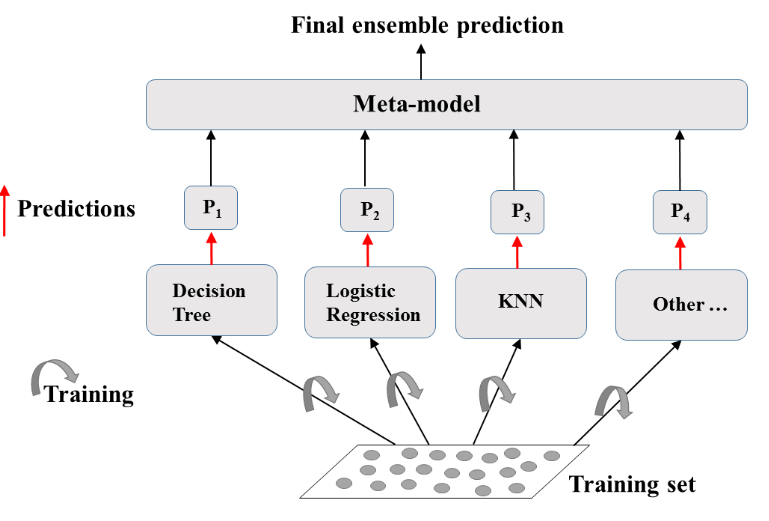

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import VotingClassifier

# Set seed for reproducibility
SEED = 1

df = pd.read_csv('data.csv').drop(columns='Unnamed: 32')
X = df.iloc[:, 2:]
y = df['diagnosis'].apply(lambda x: 1 if x == 'M' else 0)

# Split data into 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state= SEED)

# Instantiate individual classifiers
lr = LogisticRegression(random_state=SEED, max_iter=9999)
knn = KNN()
dt = DecisionTreeClassifier(random_state=SEED)

# Define a list called classifier that contains the tuples (classifier_name, classifier)
classifiers = [('Logistic Regression', lr),
               ('K Nearest Neighbours', knn),
               ('Classification Tree', dt)]

for clf_name, clf in classifiers:
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print('{:s} : {:.3f}'.format(clf_name, accuracy_score(y_test, y_pred)))

print("\n")
# Instantiate a VotingClassifier 'vc'
vc = VotingClassifier(estimators=classifiers)

# Fit 'vc' to the traing set and predict test set labels
vc.fit(X_train, y_train)
y_pred = vc.predict(X_test)

# Evaluate the test-set accuracy of 'vc'
print('Voting Classifier: {:.3f}'.format(accuracy_score(y_test, y_pred)))

Logistic Regression : 0.947
K Nearest Neighbours : 0.930
Classification Tree : 0.930


Voting Classifier: 0.953


### ***Define the ensemble***

In the following set of exercises, you'll work with the [Indian Liver Patient Dataset](https://www.kaggle.com/jeevannagaraj/indian-liver-patient-dataset) from the UCI Machine learning repository.

In this exercise, you'll instantiate three classifiers to predict whether a patient suffers from a liver disease using all the features present in the dataset.

The classes **`LogisticRegression`**, **`DecisionTreeClassifier`**, and **`KNeighborsClassifier`** under the alias `KNN` are available in your workspace.

* Instantiate a Logistic Regression classifier and assign it to `lr`.

* Instantiate a `KNN` classifier that considers `27` nearest neighbors and assign it to `knn`.

* Instantiate a Decision Tree Classifier with the parameter `min_samples_leaf` set to `0.13` and assign it to `dt`.

In [ ]:
df = pd.read_csv('indian_liver_patient.csv').dropna()#.drop(columns='Unnamed: 0')
X, y = df.iloc[:, :-1], df.iloc[:, -1]

# Set seed for reproducibility
SEED=1

# Instantiate lr
lr = LogisticRegression(random_state=SEED, max_iter=99999)

# Instantiate knn
knn = KNN(n_neighbors=27)

# Instantiate dt
dt = DecisionTreeClassifier(min_samples_leaf=0.13, random_state=SEED)

# Define the list classifiers
classifiers = [('Logistic Regression', lr), ('K Nearest Neighbours', knn), ('Classification Tree', dt)]

### ***Evaluate individual classifiers***

## ***ในไฟล์ตัวอย่างบน datacamp มันจะมีคอลัมน์ `Unnamed: 0` ติดมาด้วย ซึ่งมันควรจะต้องเอาออกก่อนสิ สาเหตุที่มีเพราะว่าตอนเปลี่ยนจาก Male, Female เป็น 1, 0 จะเกิดบั๊กขึ้น คาดว่าคนสอนคงขี้เกียจหาทางแก้ด้วยโค้ด จึงใช้วิธีก็อปไปทำใน csv แล้วอัพขึ้นมาใหม่ ทำให้มี `Unnamed: 0` ติดมา***

In this exercise you'll evaluate the performance of the models in the list classifiers that we defined in the previous exercise. You'll do so by fitting each classifier on the training set and evaluating its test set accuracy.

The dataset is already loaded and preprocessed for you (numerical features are standardized) and it is split into 70% train and 30% test. The features matrices `X_train` and `X_test`, as well as the arrays of labels `y_train` and `y_test` are available in your workspace. In addition, we have loaded the list classifiers from the previous exercise, as well as the function **`accuracy_score()`** from **`sklearn.metrics`**.

* Iterate over the tuples in classifiers. Use `clf_name` and `clf` as the `for` loop variables:
  * Fit `clf` to the training set.
  * Predict `clf`'s test set labels and assign the results to `y_pred`.
  * Evaluate the test set accuracy of `clf` and print the result.

In [ ]:
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('indian_liver_patient_preprocessed.csv').dropna()#.drop(columns='Unnamed: 0')
X, y = df.iloc[:, :-1], df.iloc[:, -1]
# X['Gender'] = X['Gender'].apply(lambda x: 1 if x=='Male' else 0)
# temp = X[['Gender']].copy()

# X = X.drop(columns='Gender')
# y = y.apply(lambda x: 0 if x == 2 else 1)
# scale = StandardScaler()
# X = scale.fit_transform(X)
# X = pd.DataFrame(data=X, columns=['Age_std', 'Total_Bilirubin_std', 'Direct_Bilirubin_std', 'Alkaline_Phosphotase_std', 'Alamine_Aminotransferase_std', 'Aspartate_Aminotransferase_std', 'Total_Protiens_std',
#        'Albumin_std', 'Albumin_and_Globulin_Ratio_std'])
# X = pd.concat([X, temp], axis=1)
# X['Gender'].fillna(1, inplace=True)
# X.dropna(inplace=True)
# X['Gender'] = X['Gender'].astype(int) # มีบั๊กอะไรไม่รู้เลยต้องเขียนยุ่งยาก คือ มีตัว NaN แต่ตอนเรียก .isnull() ไม่เจอ
# X.rename(columns={'Gender':'Is_male_std'}, inplace=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state=SEED)
# X.head()

In [ ]:
# Iterate over the pre-defined list of classifiers
for clf_name, clf in classifiers:    
 
    # Fit clf to the training set
    clf.fit(X_train, y_train)    
   
    # Predict y_pred
    y_pred = clf.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred) 
   
    # Evaluate clf's accuracy on the test set
    print('{:s} : {:.3f}'.format(clf_name, accuracy))

Logistic Regression : 0.753
K Nearest Neighbours : 0.724
Classification Tree : 0.730


Notice how Logistic Regression achieved the highest accuracy of 75.3%.

### ***Better performance with a Voting Classifier***

Finally, you'll evaluate the performance of a voting classifier that takes the outputs of the models defined in the list classifiers and assigns labels by majority voting.

`X_train, X_test,y_train, y_test`, the list classifiers defined in a previous exercise, as well as the function `accuracy_score` from **`sklearn.metrics`** are available in your workspace.

* Instantiate a **`VotingClassifier`** by setting the parameter estimators to classifiers and assign it to `vc`.
* Fit `vc` to the training set.
* Evaluate `vc`'s test set accuracy using the test set predictions `y_pred`.

In [ ]:
from sklearn.ensemble import VotingClassifier

# Instantiate a VotingClassifier vc
vc = VotingClassifier(estimators=classifiers)     

# Fit vc to the training set
vc.fit(X_train, y_train)   

# Evaluate the test set predictions
y_pred = vc.predict(X_test)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
print('Voting Classifier: {:.3f}'.format(accuracy))

Voting Classifier: 0.764


Notice how the voting classifier achieves a test set accuracy of 76.4%. This value is greater than that achieved by LogisticRegression.

# ***Bootstrap***

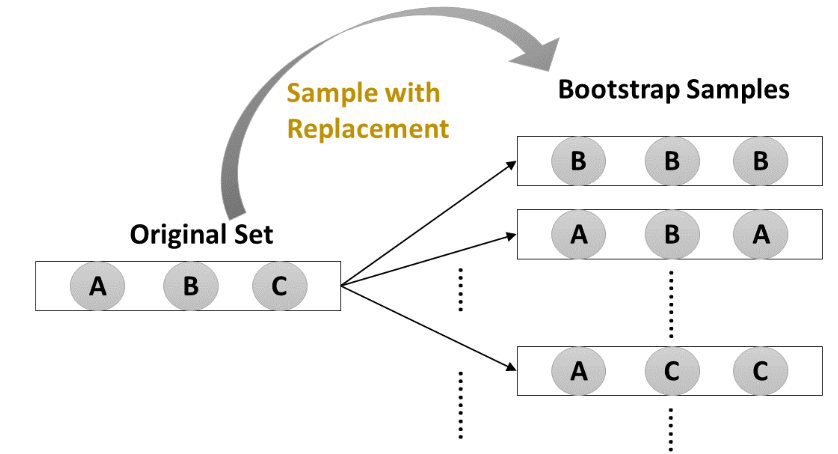

  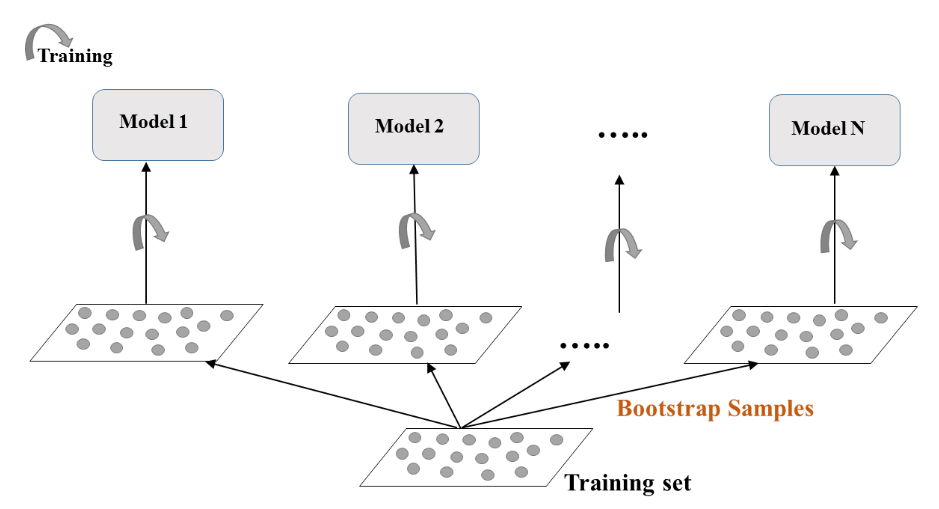

# ***Bagging Classifier in sklearn (Breast-Cancer dataset)***

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

df = pd.read_csv('data.csv').drop(columns='Unnamed: 32')
X = df.iloc[:, 2:]
y = df['diagnosis'].apply(lambda x: 1 if x == 'M' else 0) # สลับค่าให้เหมือนแบบฝึกหัด
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y,random_state=1)

# Set seed for reproducibility
SEED = 1

# Split data into 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=SEED)

# Instantiate a classification-tree 'dt'
dt = DecisionTreeClassifier(max_depth=4, min_samples_leaf=0.16, random_state=SEED)

# Instantiate a BaggingClassifier 'bc'
bc = BaggingClassifier(base_estimator=dt, n_estimators=300, n_jobs=-1)

# Fit 'bc' to the training set
bc.fit(X_train, y_train)
dt.fit(X_train, y_train)

# Predict test set labels
y_pred = bc.predict(X_test)
y_pred_dt = dt.predict(X_test)

# Evaluate and print test-set accuracy
accuracy = accuracy_score(y_test, y_pred)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f'Accuracy of Bagging Classifier: {accuracy:,.3f}\nAccuracy of Decision Tree Classifier: {accuracy_dt:,.3f}')

Accuracy of Bagging Classifier: 0.936
Accuracy of Decision Tree Classifier: 0.889


จะเห็นว่าวิธี Bagging ได้ค่า accuracy มากกว่า Decision Tree ตามปกติ

### ***Define the bagging classifier***

In the following exercises you'll work with the [Indian Liver Patient](https://www.kaggle.com/uciml/indian-liver-patient-records) dataset from the UCI machine learning repository. Your task is to predict whether a patient suffers from a liver disease using 10 features including Albumin, age and gender. You'll do so using a Bagging Classifier.


* Instantiate a **`DecisionTreeClassifier`** called `dt`.

* Instantiate a **`BaggingClassifier`** called `bc` consisting of `50` trees.

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

# Instantiate dt
dt = DecisionTreeClassifier(random_state=1)

# Instantiate bc
bc = BaggingClassifier(base_estimator=dt, n_estimators=50, random_state=1)

### ***Evaluate Bagging performance***

Now that you instantiated the bagging classifier, it's time to train it and evaluate its test set accuracy.

The Indian Liver Patient dataset is processed for you and split into 80% train and 20% test. The feature matrices X_train and X_test, as well as the arrays of labels y_train and y_test are available in your workspace. In addition, we have also loaded the bagging classifier bc that you instantiated in the previous exercise and the function accuracy_score() from sklearn.metrics.

Instructions
100 XP
Instructions
100 XP
Fit bc to the training set.

Predict the test set labels and assign the result to y_pred.

Determine bc's test set accuracy.

In [ ]:
df = pd.read_csv('indian_liver_patient.csv').dropna()#.drop(columns='Unnamed: 0')
X, y = df.iloc[:, :-1], df.iloc[:, -1]
X['Gender'] = X['Gender'].apply(lambda x: 1 if x=='Male' else 0)
temp = X[['Gender']].copy()

X = X.drop(columns='Gender')
y = y.apply(lambda x: 0 if x == 2 else 1)
X = pd.concat([X, temp], axis=1)
X['Gender'].fillna(1, inplace=True)
X.dropna(inplace=True)
X['Gender'] = X['Gender'].astype(int) # มีบั๊กอะไรไม่รู้เลยต้องเขียนยุ่งยาก คือ มีตัว NaN แต่ตอนเรียก .isnull() ไม่เจอ
X.rename(columns={'Gender':'Is_male_std'}, inplace=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state=SEED)


# Fit bc to the training set
bc.fit(X_train, y_train)
dt.fit(X_train, y_train)

# Predict test set labels
y_pred = bc.predict(X_test)
y_pred_dt = dt.predict(X_test)

# Evaluate acc_test
acc_test = accuracy_score(y_test, y_pred)
acc_test_dt = accuracy_score(y_test, y_pred_dt)
print('Test set accuracy of bc: {:.2f}'.format(acc_test)) 
print('Test set accuracy of dt: {:.2f}'.format(acc_test_dt)) 

Test set accuracy of bc: 0.70
Test set accuracy of dt: 0.68


A single tree `dt` would have achieved an accuracy of 68% which is 2% lower than `bc`'s accuracy.

# ***Out of BAG (OOB) Evaluation***

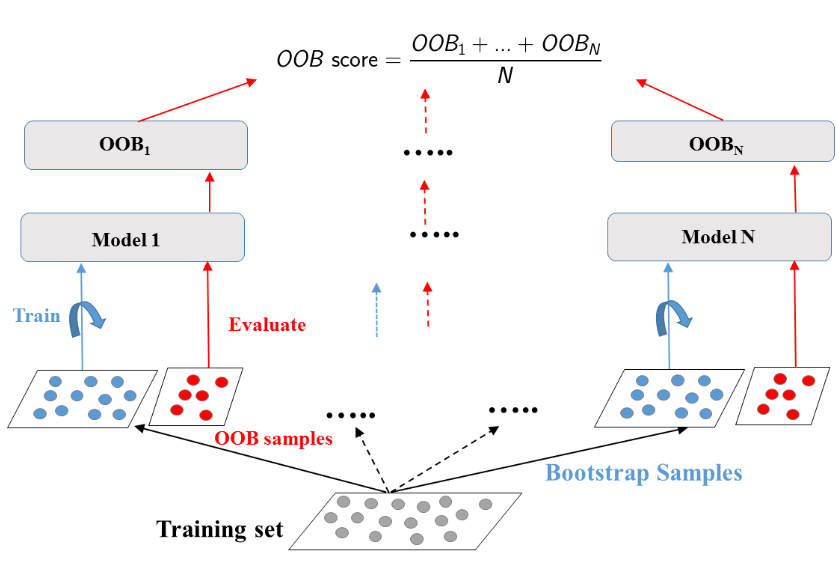

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

df = pd.read_csv('data.csv').drop(columns='Unnamed: 32')
X = df.iloc[:, 2:]
y = df['diagnosis'].apply(lambda x: 1 if x == 'M' else 0) # สลับค่าให้เหมือนแบบฝึกหัด
SEED = 1

# Split data into 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, stratify= y,random_state=SEED)

# Instantiate a classification-tree 'dt'
dt = DecisionTreeClassifier(max_depth=4, min_samples_leaf=0.16, random_state=SEED)

# Instantiate a BaggingClassifier 'bc'; set oob_score = True
bc = BaggingClassifier(base_estimator=dt, n_estimators=300, oob_score=True, n_jobs=-1)

# Fit 'bc' to the training set
bc.fit(X_train, y_train)

# Predict the test set labels
y_pred = bc.predict(X_test)

# Evaluate test set accuracy
test_accuracy = accuracy_score(y_test, y_pred)

# Extract the OOB accuracy from 'bc'
oob_accuracy = bc.oob_score_

# Print test set accuracy
print('Test set accuracy: {:.3f}'.format(test_accuracy))

# Print OOB accuracy
print('OOB accuracy: {:.3f}'.format(oob_accuracy))

Test set accuracy: 0.930
OOB accuracy: 0.925


### ***Prepare the ground***

Compare the OOB accuracy to the test set accuracy of a bagging classifier trained on the Indian Liver Patient dataset.

In sklearn, you can evaluate the OOB accuracy of an ensemble classifier by setting the parameter **`oob_score`** to `True` during instantiation. After training the classifier, the OOB accuracy can be obtained by accessing the **`.oob_score_`** attribute from the corresponding instance.

In your environment, we have made available the class **`DecisionTreeClassifier`** `from sklearn.tree`.

* Instantiate a **`DecisionTreeClassifier`** with **`min_samples_leaf`** set to `8`.

* Instantiate a **`BaggingClassifier`** consisting of `50` trees and set **`oob_score`** to True.

In [ ]:
# Import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

# Instantiate dt
dt = DecisionTreeClassifier(min_samples_leaf=8, random_state=1)

# Instantiate bc
bc = BaggingClassifier(base_estimator=dt, 
            n_estimators=50,  
            oob_score=True,
            random_state=1)

### ***OOB Score vs Test Set Score***

Now that you instantiated `bc`, you will fit it to the training set and evaluate its test set and OOB accuracies.

The dataset is processed for you and split into 80% train and 20% test. The feature matrices `X_train` and `X_test`, as well as the arrays of labels `y_train` and `y_test` are available in your workspace. In addition, we have also loaded the classifier `bc` instantiated in the previous exercise and the function **`accuracy_score()`** from **`sklearn.metrics`**.


* Fit bc to the training set and predict the test set labels and assign the results to `y_pred`.

* Evaluate the test set accuracy `acc_test` by calling `accuracy_score`.

* Evaluate bc's OOB accuracy `acc_oob` by extracting the attribute **`.oob_score_`** from `bc`.

In [ ]:
df = pd.read_csv('indian_liver_patient.csv').dropna()#.drop(columns='Unnamed: 0')
X, y = df.iloc[:, :-1], df.iloc[:, -1]
X['Gender'] = X['Gender'].apply(lambda x: 1 if x=='Male' else 0)
temp = X[['Gender']].copy()
X = X.drop(columns='Gender')
y = y.apply(lambda x: 0 if x == 2 else 1)
X = pd.concat([X, temp], axis=1)
X['Gender'].fillna(1, inplace=True)
X.dropna(inplace=True)
X['Gender'] = X['Gender'].astype(int) # มีบั๊กอะไรไม่รู้เลยต้องเขียนยุ่งยาก คือ มีตัว NaN แต่ตอนเรียก .isnull() ไม่เจอ
X.rename(columns={'Gender':'Is_male_std'}, inplace=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, stratify=y, random_state=SEED)

# Fit bc to the training set 
bc.fit(X_train, y_train)

# Predict test set labels
y_pred = bc.predict(X_test)

# Evaluate test set accuracy
acc_test = accuracy_score(y_test, y_pred)

# Evaluate OOB accuracy
acc_oob = bc.oob_score_

# Print acc_test and acc_oob
print('Test set accuracy: {:.3f}, OOB accuracy: {:.3f}'.format(acc_test, acc_oob))

Test set accuracy: 0.698, OOB accuracy: 0.702


The test set accuracy and the OOB accuracy of bc are both roughly equal to 70%.

# ***Random Forest***

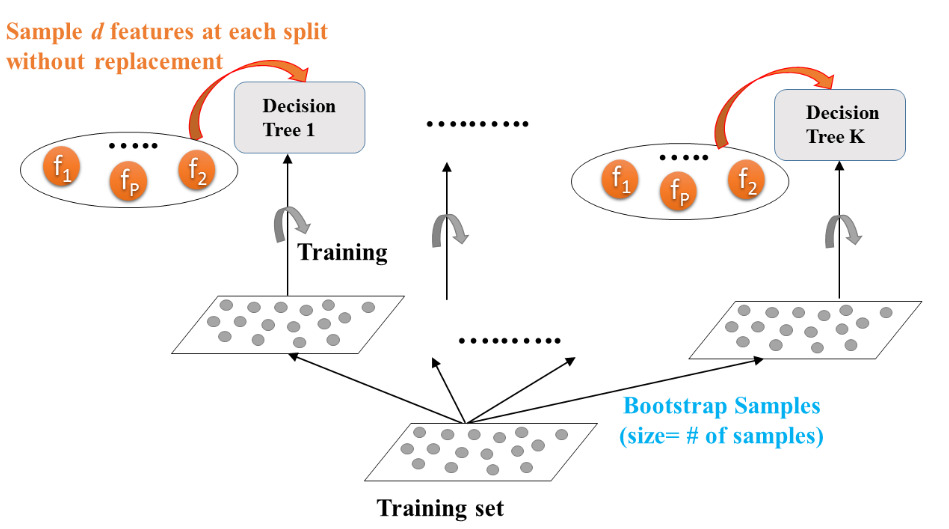

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE

df = pd.read_csv('auto.csv')
X, y = pd.get_dummies(df.drop(columns='mpg')), df['mpg']

SEED = 1

# Split dataset into 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=SEED)

# Instantiate a random forests regressor 'rf' 400 estimators
rf = RandomForestRegressor(n_estimators=400, min_samples_leaf=0.12, random_state=SEED)

# Fit 'rf' to the training set
rf.fit(X_train, y_train)

# Predict the test set labels 'y_pred'
y_pred = rf.predict(X_test)

# Evaluate the test set RMSE
rmse_test = MSE(y_test, y_pred)**(1/2)

# Print the test set RMSE
print('Test set RMSE of rf: {:.2f}'.format(rmse_test))

Test set RMSE of rf: 3.98


### ถ้า Random Forest เราใช้ n_estimators=400 มันจะมีต้นไม้ 400 ต้น เวลาพล็อต ใช้ `rf.estimators[j]` โดยที่ j = 0,..., 400 

* ### งงว่า ทำไม **`graphviz`** กับ **`plot_tree`** ออกมาไม่เหมือนกัน อันข้างบนที่พล็อต dt ยังเหมือนกันเลย

[Text(0.5, 0.8333333333333334, 'weight <= 2715.5\nsquared_error = 72.558\nsamples = 177\nvalue = 23.705'),
 Text(0.25, 0.5, 'hp <= 71.5\nsquared_error = 48.326\nsamples = 84\nvalue = 30.162'),
 Text(0.125, 0.16666666666666666, 'squared_error = 35.02\nsamples = 36\nvalue = 35.21'),
 Text(0.375, 0.16666666666666666, 'squared_error = 23.516\nsamples = 48\nvalue = 26.243'),
 Text(0.75, 0.5, 'hp <= 132.5\nsquared_error = 16.269\nsamples = 93\nvalue = 17.434'),
 Text(0.625, 0.16666666666666666, 'squared_error = 10.088\nsamples = 52\nvalue = 20.095'),
 Text(0.875, 0.16666666666666666, 'squared_error = 4.231\nsamples = 41\nvalue = 14.129')]

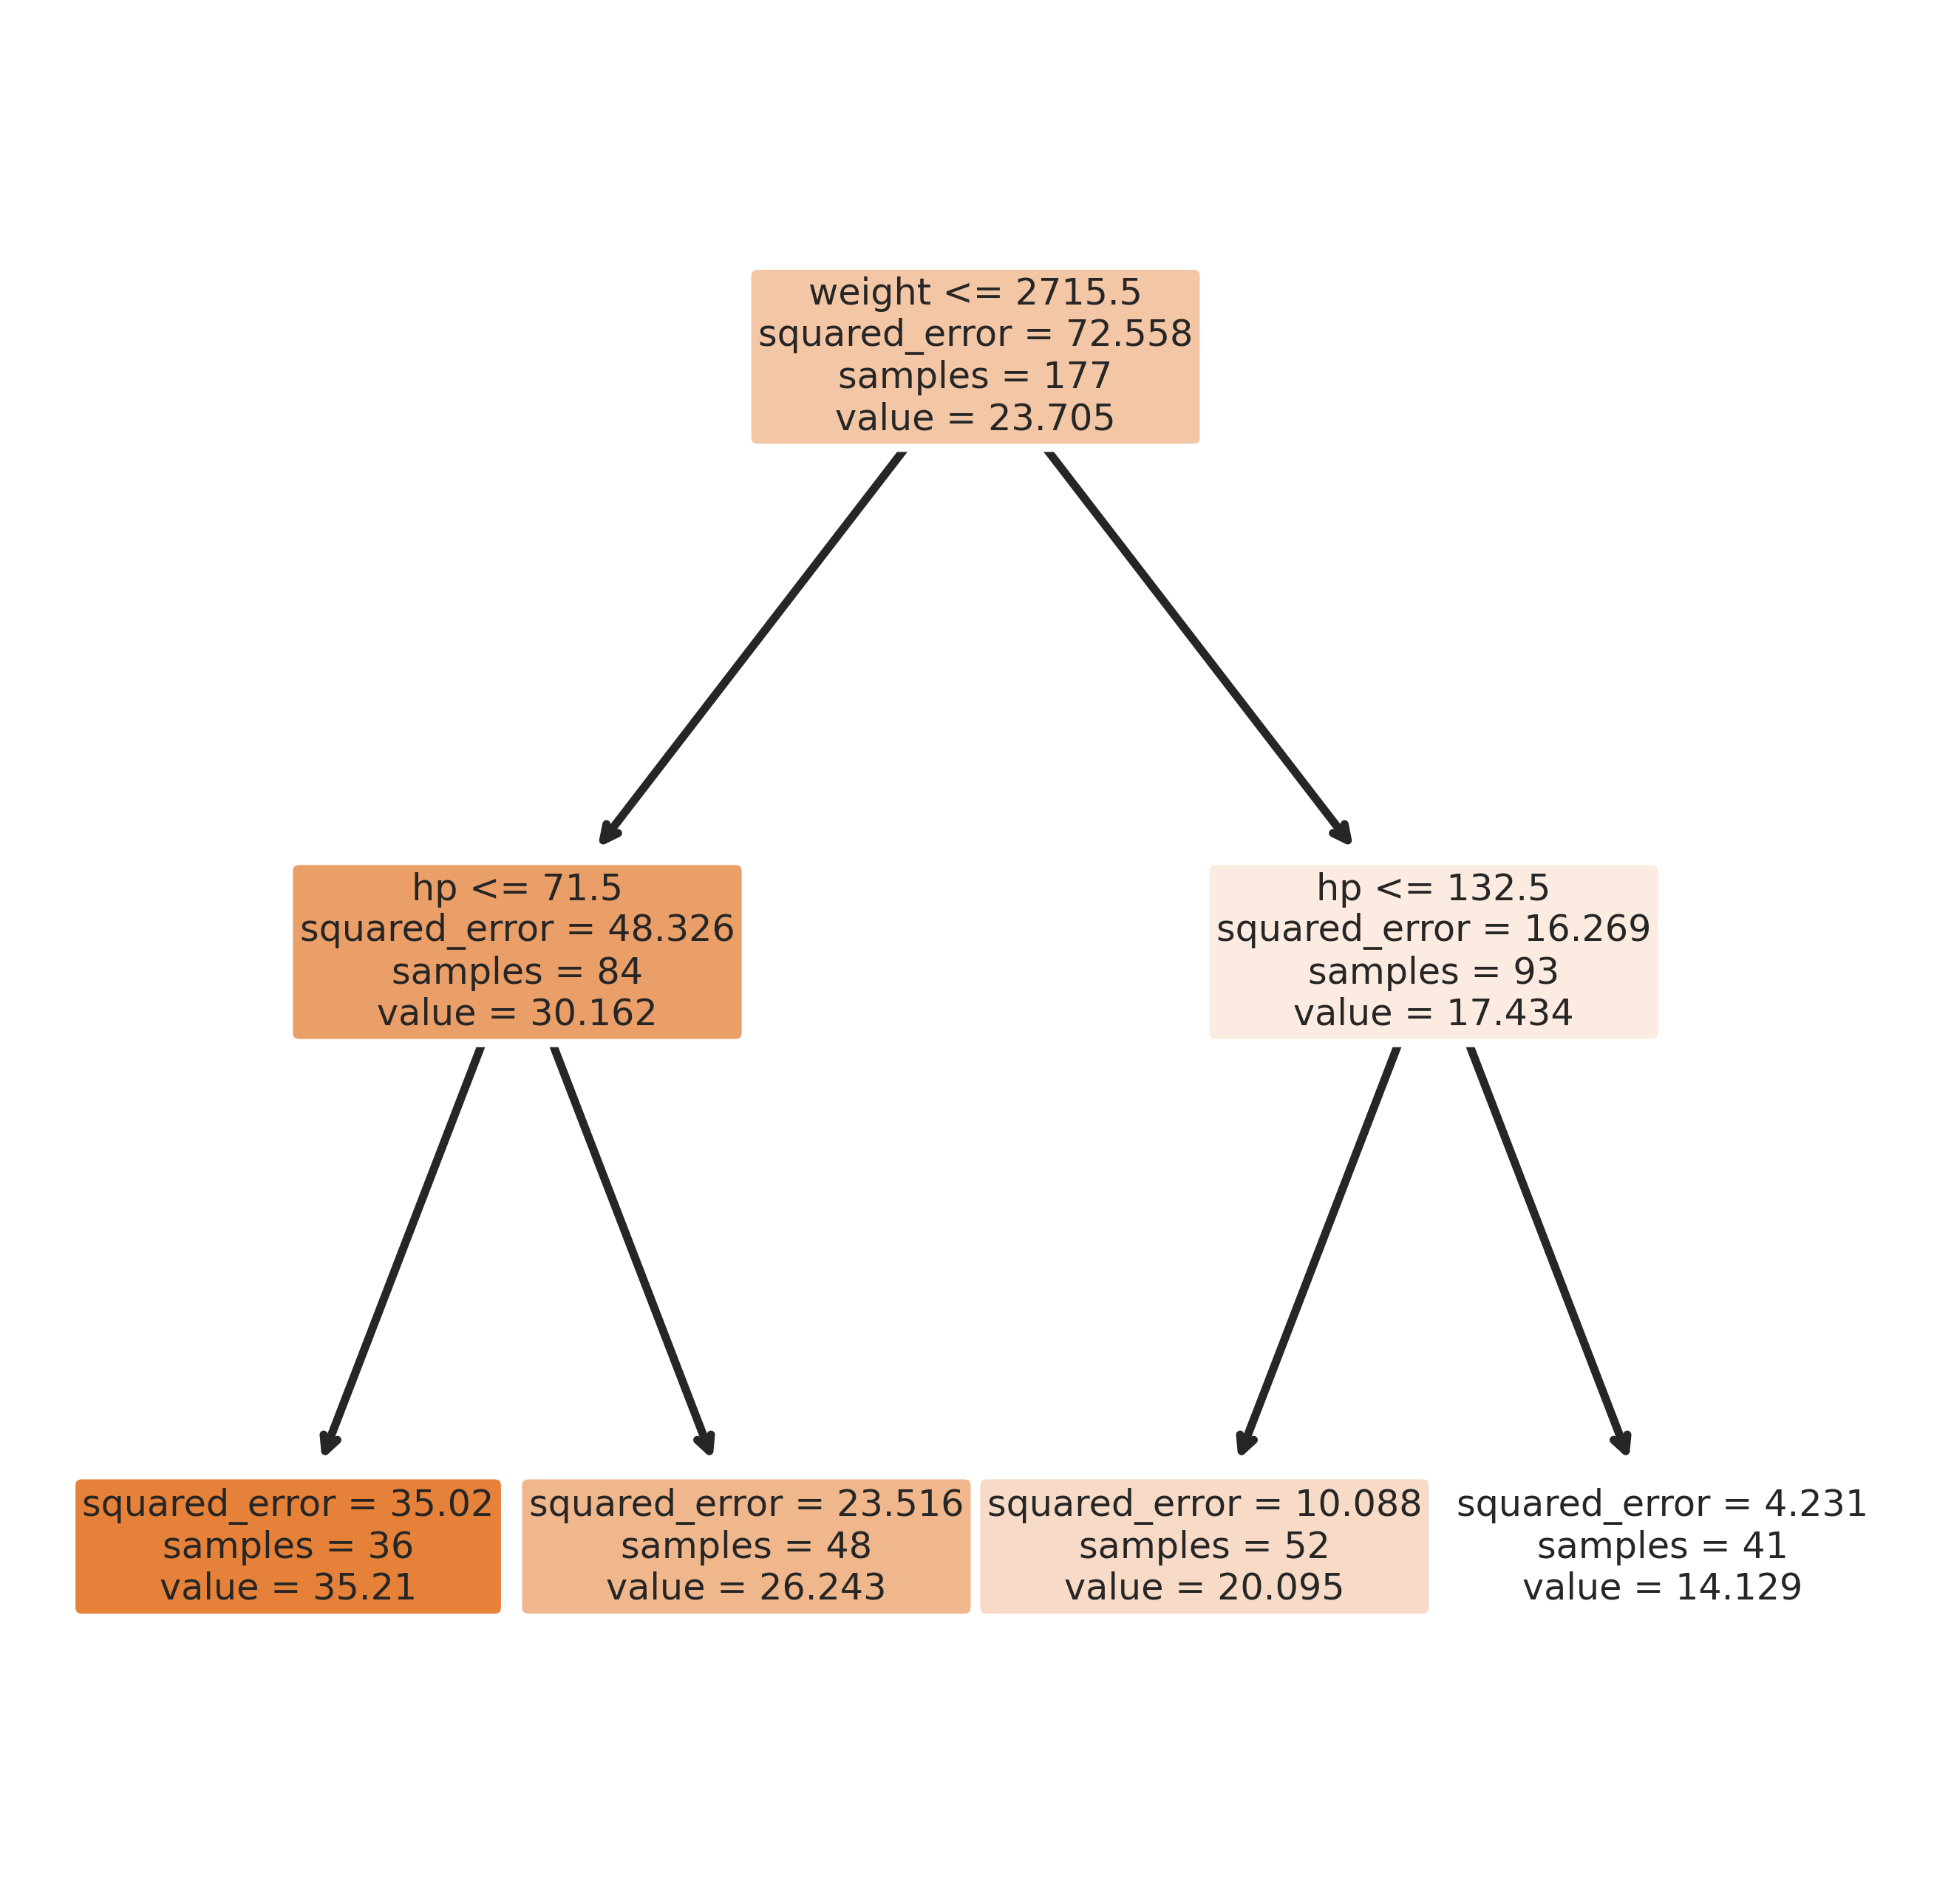

In [ ]:
from sklearn.tree import plot_tree

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
plot_tree(rf.estimators_[0],feature_names=X.columns, filled=True, rounded=True)
#display(graphviz.Source(tree_graph))

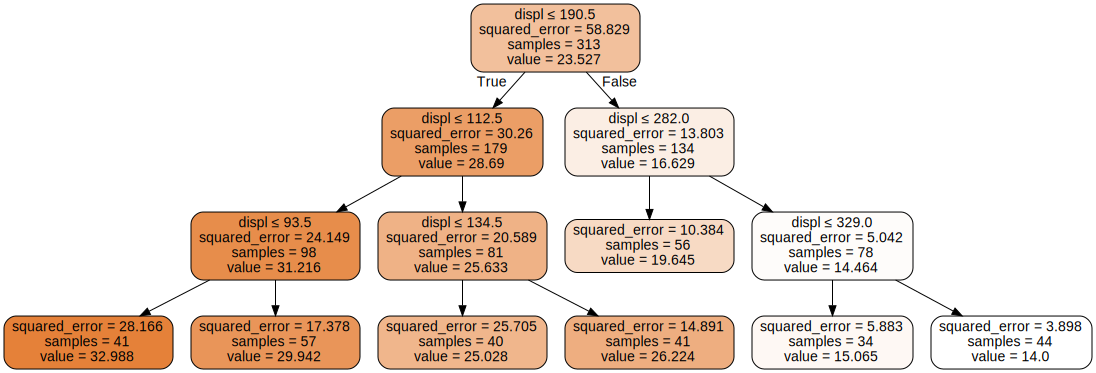

In [ ]:
export_graphviz(rf.estimators_[0], feature_names=X.columns,
                                  filled=True, rounded=True)
display(graphviz.Source(tree_graph))

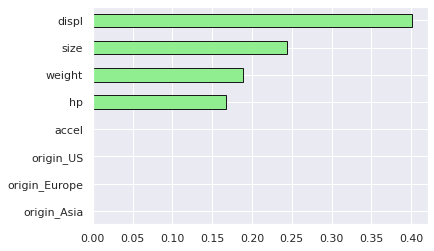

In [ ]:
# Create a pd.Series of features importances
importances_rf = pd.Series(rf.feature_importances_, index=X.columns)

# Sort importances_rf
sorted_importances_rf = importances_rf.sort_values()

# Make a horizontal bar plot
sorted_importances_rf.plot(kind='barh', color='lightgreen', edgecolor='k')
plt.show()

### ***Train an RF regressor***

In the following exercises you'll predict bike rental demand in the Capital Bikeshare program in Washington, D.C using historical weather data from the [Bike Sharing Demand dataset](https://www.kaggle.com/c/bike-sharing-demand) available through Kaggle. For this purpose, you will be using the random forests algorithm. As a first step, you'll define a random forests regressor and fit it to the training set.

The dataset is processed for you and split into 80% train and 20% test. The features matrix `X_train` and the array `y_train` are available in your workspace.

* Import **`RandomForestRegressor`** from **`sklearn.ensemble`**.

* Instantiate a **`RandomForestRegressor`** called `rf` consisting of 25 trees.

* Fit `rf` to the training set.

In [ ]:
from sklearn.ensemble import RandomForestRegressor

df = pd.read_csv('bikes.csv')
X, y = df.drop(columns='cnt'), df['cnt']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Instantiate rf
rf = RandomForestRegressor(n_estimators=25, random_state=2)
            
# Fit rf to the training set    
rf.fit(X_train, y_train) 

RandomForestRegressor(n_estimators=25, random_state=2)

### ***Evaluate the RF regressor***

You'll now evaluate the test set RMSE of the random forests regressor `rf` that you trained in the previous exercise.

The dataset is processed for you and split into 80% train and 20% test. The features matrix `X_test`, as well as the array `y_test` are available in your workspace. In addition, we have also loaded the model `rf` that you trained in the previous exercise.


* Predict the test set labels and assign the result to `y_pred`.
* Compute the test set RMSE and assign it to `rmse_test`.

In [ ]:
# Import mean_squared_error as MSE
from sklearn.metrics import mean_squared_error as MSE

# Predict the test set labels
y_pred = rf.predict(X_test)

# Evaluate the test set RMSE
rmse_test = MSE(y_test, y_pred)**(1/2)

# Print rmse_test
print('Test set RMSE of rf: {:.2f}'.format(rmse_test))

Test set RMSE of rf: 51.84


You can try training a single CART on the same dataset. The test set RMSE achieved by `rf` is significantly smaller than that achieved by a single CART!



In [ ]:
dt = DecisionTreeRegressor(random_state=2)
              
dt.fit(X_train, y_train) 
y_pred = dt.predict(X_test)

# Evaluate the test set RMSE
rmse_test = MSE(y_test, y_pred)**(1/2)

# Print rmse_test
print('Test set RMSE of rf: {:.2f}'.format(rmse_test))

Test set RMSE of rf: 68.81


### ***Visualizing features importances***

Determine which features were the most predictive according to the random forests regressor `rf` that you trained in a previous exercise.

For this purpose, you'll draw a horizontal barplot of the feature importance as assessed by `rf`. Fortunately, this can be done easily thanks to plotting capabilities of pandas.

We have created a **`pandas.Series`** object called `importances` containing the feature names as index and their importances as values. 

* Call the **`.sort_values()`** method on importances and assign the result to `importances_sorted`.


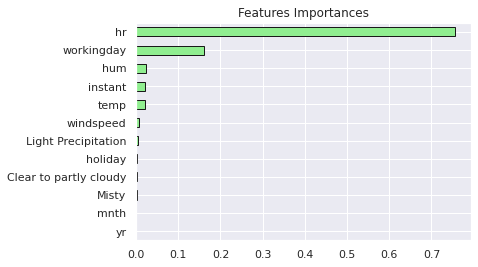

In [ ]:
# Create a pd.Series of features importances
importances = pd.Series(data=rf.feature_importances_,
                        index= X_train.columns)

# Sort importances
importances_sorted = importances.sort_values()

# Draw a horizontal barplot of importances_sorted
importances_sorted.plot(kind='barh', color='lightgreen', edgecolor='k')
plt.title('Features Importances')
plt.show()

`hr` and `workingday` are the most important features according to `rf`. The importances of these two features add up to more than 90%!

# ***AdaBoost Classification in sklearn (Breast Cancer dataset)***

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split

df = pd.read_csv('data.csv').drop(columns='Unnamed: 32')
X = df.iloc[:, 2:]
y = df['diagnosis'].apply(lambda x: 1 if x == 'M' else 0)

# Set seed for reproducibility
SEED = 1

# Split data into 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y,random_state=SEED)

# Instantiate a classification-tree 'dt'
dt = DecisionTreeClassifier(max_depth=1, random_state=SEED)

# Instantiate an AdaBoost classifier 'adab_clf'
adb_clf = AdaBoostClassifier(base_estimator=dt, n_estimators=100)

# Fit 'adb_clf' to the training set
adb_clf.fit(X_train, y_train)
dt.fit(X_train, y_train)

# Predict the test set probabilities of positive class
y_pred_proba = adb_clf.predict_proba(X_test)[:,1]
y_pred_proba_dt = dt.predict_proba(X_test)[:,1]

# Evaluate test-set roc_auc_score
adb_clf_roc_auc_score = roc_auc_score(y_test, y_pred_proba)
dt_roc_auc_score = roc_auc_score(y_test, y_pred_proba_dt)

# Print adb_clf_roc_auc_score
print('ROC AUC score Boost: {:.2f}'.format(adb_clf_roc_auc_score))
print('ROC AUC score Decision Tree: {:.2f}'.format(dt_roc_auc_score))

ROC AUC score Boost: 0.99
ROC AUC score Decision Tree: 0.85


### ***Define the AdaBoost classifier
In the following exercises you'll revisit the [Indian Liver Patient dataset](https://www.kaggle.com/uciml/indian-liver-patient-records) which was introduced in a previous chapter. Your task is to predict whether a patient suffers from a liver disease using `10` features including Albumin, age and gender. However, this time, you'll be training an AdaBoost ensemble to perform the classification task. In addition, given that this dataset is imbalanced, you'll be using the ROC AUC score as a metric instead of accuracy.

As a first step, you'll start by instantiating an AdaBoost classifier.

* Instantiate a **`DecisionTreeClassifier`** with **`max_depth=2`**.

* Instantiate an **`AdaBoostClassifier`** consisting of `180` trees and setting the **`base_estimator`** to `dt`.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

dt = DecisionTreeClassifier(max_depth=2, random_state=1)

# Instantiate ada
ada = AdaBoostClassifier(base_estimator=dt, n_estimators=180, random_state=1)

### ***Train the AdaBoost classifier***

Now that you've instantiated the AdaBoost classifier `ada`, it's time to train it. You will also predict the probabilities of obtaining the positive class in the test set. This can be done as follows:

Once the classifier `ada` is trained, call the **`.predict_proba()`** method by passing `X_test` as a parameter and extract these probabilities by slicing all the values in the second column as follows:

```
ada.predict_proba(X_test)[:,1]
```

The Indian Liver dataset is processed for you and split into 80% train and 20% test. Feature matrices `X_train` and `X_test`, as well as the arrays of labels `y_train` and `y_test` are available in your workspace. In addition, we have also loaded the instantiated model `ada` from the previous exercise.

* Fit `ada` to the training set.

* Evaluate the probabilities of obtaining the positive class in the test set.

In [ ]:
df = pd.read_csv('indian_liver_patient.csv').dropna()#.drop(columns='Unnamed: 0')
X, y = df.iloc[:, :-1], df.iloc[:, -1]
X['Gender'] = X['Gender'].apply(lambda x: 1 if x=='Male' else 0)
temp = X[['Gender']].copy()
X = X.drop(columns='Gender')
y = y.apply(lambda x: 0 if x == 2 else 1)
X = pd.concat([X, temp], axis=1)
X['Gender'].fillna(1, inplace=True)
X.dropna(inplace=True)
X['Gender'] = X['Gender'].astype(int) # มีบั๊กอะไรไม่รู้เลยต้องเขียนยุ่งยาก คือ มีตัว NaN แต่ตอนเรียก .isnull() ไม่เจอ
X.rename(columns={'Gender':'Is_male_std'}, inplace=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, stratify=y, random_state=1)

# Fit ada to the training set
ada.fit(X_train, y_train)

# Compute the probabilities of obtaining the positive class
y_pred_proba = ada.predict_proba(X_test)[:, 1]

### ***Evaluate the AdaBoost classifier***

Now that you're done training `ada` and predicting the probabilities of obtaining the positive class in the test set, it's time to evaluate ada's ROC AUC score. Recall that the ROC AUC score of a binary classifier can be determined using the **`roc_auc_score()`** function from **`sklearn.metrics`**.

The arrays `y_test` and `y_pred_proba` that you computed in the previous exercise are available in your workspace.


* Compute ada's test set ROC AUC score, assign it to **`ada_roc_auc`**, and print it out.

In [ ]:
from sklearn.metrics import roc_auc_score

# Evaluate test-set roc_auc_score
ada_roc_auc = roc_auc_score(y_test, y_pred_proba)

# Print roc_auc_score
print('ROC AUC score: {:.2f}'.format(ada_roc_auc))

ROC AUC score: 0.70


This untuned AdaBoost classifier achieved a ROC AUC score of 0.70!

# ***Gradient Boosting in sklearn (auto dataset)***



In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE

SEED = 1

df = pd.read_csv('auto.csv')
X, y = pd.get_dummies(df.drop(columns='mpg')), df['mpg']
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.3, random_state=SEED)

# Instantiate a GradientBoostingRegressor 'gbt'
gbt = GradientBoostingRegressor(n_estimators=300, max_depth=1, random_state=SEED)

# Fit 'gbt' to the training set
gbt.fit(X_train, y_train)

# Predict the test set labels
y_pred = gbt.predict(X_test)

# Evaluate the test set RMSE
rmse_test = MSE(y_test, y_pred)**(1/2)

# Print the test set RMSE
print('Test set RMSE: {:.2f}'.format(rmse_test))

Test set RMSE: 4.01


### ***Define the GB regressor***

You'll now revisit the [Bike Sharing Demand dataset](https://www.kaggle.com/c/bike-sharing-demand) that was introduced in the previous chapter. Recall that your task is to predict the bike rental demand using historical weather data from the Capital Bikeshare program in Washington, D.C.. For this purpose, you'll be using a gradient boosting regressor.

As a first step, you'll start by instantiating a gradient boosting regressor which you will train in the next exercise.

* Instantiate a gradient boosting regressor by setting the parameters:

* `max_depth` to 4
* `n_estimators` to 200

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

# Instantiate gb
gb = GradientBoostingRegressor(max_depth=4, n_estimators=200, random_state=2)

### ***Train the GB regressor***

You'll now train the gradient boosting regressor `gb` that you instantiated in the previous exercise and predict test set labels.

The dataset is split into 80% train and 20% test. Feature matrices `X_train` and `X_test`, as well as the arrays `y_train` and `y_test` are available in your workspace. In addition, we have also loaded the model instance `gb` that you defined in the previous exercise.

* Fit `gb` to the training set.
* Predict the test set labels and assign the result to `y_pred`.

In [ ]:
df = pd.read_csv('bikes.csv')
X, y = df.drop(columns='cnt'), df['cnt']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

gb.fit(X_train, y_train)

# Predict test set labels
y_pred = gb.predict(X_test)

### ***Evaluate the GB regressor***

Now that the test set predictions are available, you can use them to evaluate the test set Root Mean Squared Error (RMSE) of `gb`.

`y_test` and predictions `y_pred` are available in your workspace.

* Compute the test set MSE and assign it to `mse_test`.
* Compute the test set RMSE and assign it to `rmse_test`.

In [ ]:
from sklearn.metrics import mean_squared_error

# Compute MSE
mse_test = mean_squared_error(y_test, y_pred)

# Compute RMSE
rmse_test = mse_test**(1/2)

# Print RMSE
print('Test set RMSE of gb: {:.3f}'.format(rmse_test))

Test set RMSE of gb: 49.537


# ***Stochastic Gradient Boosting in sklearn (auto dataset)***

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE

df = pd.read_csv('auto.csv')
X, y = pd.get_dummies(df.drop(columns='mpg')), df['mpg']

# Set seed for reproducibility
SEED = 1

# Split dataset into 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=SEED)

# Instantiate a stochastic GradientBoostingRegressor 'sgbt'
sgbt = GradientBoostingRegressor(max_depth=1, subsample=0.8, max_features=0.2, n_estimators=300, random_state=SEED) 

# Fit 'sgbt' to the training set
sgbt.fit(X_train, y_train)

# Predict the test set labels
y_pred = sgbt.predict(X_test)

# Evaluate test set RMSE 'rmse_test'
rmse_test = MSE(y_test, y_pred)**(1/2)

# Print 'rmse_test'
print('Test set RMSE: {:.2f}'.format(rmse_test))

Test set RMSE: 3.95


### ***Regression with SGB***

As in the exercises from the previous lesson, you'll be working with the [Bike Sharing Demand dataset](https://www.kaggle.com/c/bike-sharing-demand). In the following set of exercises, you'll solve this bike count regression problem using stochastic gradient boosting.

* Instantiate a Stochastic Gradient Boosting Regressor (SGBR) and set:

  * **`max_depth`** to 4 and **`n_estimators`** to 200,
  * **`subsample`** to 0.9, and
  * **`max_features`** to 0.75.

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

df = pd.read_csv('bikes.csv')
X, y = df.drop(columns='cnt'), df['cnt']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# Instantiate sgbr
sgbr = GradientBoostingRegressor(max_depth=4, subsample=0.9, max_features=0.75, n_estimators=200, random_state=2)

### ***Train the SGB regressor***

In this exercise, you'll train the SGBR sgbr instantiated in the previous exercise and predict the test set labels.

The bike sharing demand dataset is already loaded processed for you; it is split into 80% train and 20% test. The feature matrices `X_train` and `X_test`, the arrays of labels `y_train` and `y_test`, and the model instance `sgbr` that you defined in the previous exercise are available in your workspace.

* Fit `sgbr` to the training set.
* Predict the test set labels and assign the results to `y_pred`.

In [ ]:
# Fit sgbr to the training set
sgbr.fit(X_train, y_train)

# Predict test set labels
y_pred = sgbr.predict(X_test)

### ***Evaluate the SGB regressor***

You have prepared the ground to determine the test set RMSE of `sgbr` which you shall evaluate in this exercise.

`y_pred` and `y_test` are available in your workspace.

* Import **`mean_squared_error`** as `MSE` from sklearn.metrics.

* Compute test set MSE and assign the result to `mse_test`.

* Compute test set RMSE and assign the result to `rmse_test`.

In [ ]:
from sklearn.metrics import mean_squared_error

# Compute test set MSE
mse_test = mean_squared_error(y_test, y_pred)

# Compute test set RMSE
rmse_test = mse_test**(1/2)

# Print rmse_test
print('Test set RMSE of sgbr: {:.3f}'.format(rmse_test))

Test set RMSE of sgbr: 47.260


The stochastic gradient boosting regressor achieves a lower test set RMSE than the gradient boosting regressor (which was49.537)!

## จะบอกว่า น้อยกว่า หรือจะมากกว่า แทบจะขึ้นกับ **`random_state`** อย่างเช่นตอน `train_test_split` ถ้าหากใช้ **`random_state=1`** จะได้ RMSE ของ sgb มากกว่าของ gb ด้วยซ้ำ

# ***Inspecting the hyperparameters of a CART in sklearn***

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from pprint import pprint
# Set seed to 1 for reproducibility
SEED = 1

# Instantiate a DecisionTreeClassifier 'dt'
dt = DecisionTreeClassifier(random_state=SEED)

# Print out 'dt's hyperparameters
pprint(dt.get_params())

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 1,
 'splitter': 'best'}


# ***Extracting the best hyperparameters***

In [ ]:
df = pd.read_csv('data.csv').drop(columns='Unnamed: 32')
X = df.iloc[:, 2:]
y = df['diagnosis'].apply(lambda x: 1 if x == 'M' else 0) # สลับค่าให้เหมือนแบบฝึกหัด
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y,random_state=1)

from sklearn.model_selection import GridSearchCV

# Define the grid of hyperparameters 'params_dt'
params_dt = {'max_depth': [3, 4,5, 6],
             'min_samples_leaf': [0.04, 0.06, 0.08],
             'max_features': [0.2, 0.4,0.6, 0.8]}

# Instantiate a 10-fold CV grid search object 'grid_dt'
grid_dt = GridSearchCV(estimator=dt, param_grid=params_dt, scoring='accuracy', cv=10, n_jobs=-1)

# Fit 'grid_dt' to the training data
grid_dt.fit(X_train, y_train)

# Extract best hyperparameters from 'grid_dt'
best_hyperparams = grid_dt.best_params_
print('Best hyerparameters:\n', best_hyperparams)

# Extract best CV score from 'grid_dt'
best_CV_score = grid_dt.best_score_
print('Best CV accuracy: {:,.3f}'.format(best_CV_score))

Best hyerparameters:
 {'max_depth': 4, 'max_features': 0.4, 'min_samples_leaf': 0.04}
Best CV accuracy: 0.941


# ***Extracting the best estimator***

In [ ]:
# Extract best model from 'grid_dt'
best_model = grid_dt.best_estimator_

# Evaluate test set accuracy
test_acc = best_model.score(X_test, y_test)

# Print test set accuracy
print("Test set accuracy of best model: {:.3f}".format(test_acc))

Test set accuracy of best model: 0.947


### ***Set the tree's hyperparameter grid***

In this exercise, you'll manually set the grid of hyperparameters that will be used to tune the classification tree `dt` and find the optimal classifier in the next exercise.

* Define a grid of hyperparameters corresponding to a Python dictionary called `params_dt` with:

  * the key `'max_depth'` set to a list of values 2, 3, and 4

  * the key `'min_samples_leaf'` set to a list of values 0.12, 0.14, 0.16, 0.18

In [ ]:
# Define params_dt
params_dt = {'max_depth':[2, 3, 4], 'min_samples_leaf':[0.12, 0.14, 0.16, 0.18]}

### ***Search for the optimal tree***
In this exercise, you'll perform grid search using 5-fold cross validation to find `dt`'s optimal hyperparameters. Note that because grid search is an exhaustive process, it may take a lot time to train the model. Here you'll only be instantiating the **`GridSearchCV`** object without fitting it to the training set. As discussed in the video, you can train such an object similar to any scikit-learn estimator by using the **`.fit()`** method:

```
grid_object.fit(X_train, y_train)
```

An untuned classification tree `dt` as well as the dictionary `params_dt` that you defined in the previous exercise are available in your workspace.

* Instantiate a **`GridSearchCV`** object using `5`-fold CV by setting the parameters:

  * `estimator` to `dt`, `param_grid` to `params_dt` and

  * `scoring` to `'roc_auc'`.

In [ ]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

dt = DecisionTreeClassifier(random_state=1)

# Instantiate grid_dt
grid_dt = GridSearchCV(estimator=dt,
                       param_grid=params_dt,
                       scoring='roc_auc',
                       cv=5,
                       n_jobs=-1)

### ***Evaluate the optimal tree***

In this exercise, you'll evaluate the test set ROC AUC score of `grid_dt`'s optimal model.

In order to do so, you will first determine the probability of obtaining the positive label for each test set observation. You can use the method **`.predict_proba()`** of an sklearn classifier to compute a 2D array containing the probabilities of the negative and positive class-labels respectively along columns.

The dataset is already loaded and processed for you (numerical features are standardized); it is split into 80% train and 20% test. `X_test`, `y_test` are available in your workspace. In addition, we have also loaded the trained  **`GridSearchCV`** object `grid_dt` that you instantiated in the previous exercise. Note that `grid_dt` was trained as follows:

```
grid_dt.fit(X_train, y_train)
```

* Extract the **`.best_estimator_`** attribute from `grid_dt` and assign it to `best_model`.

* Predict the test set probabilities of obtaining the positive class `y_pred_proba`.

* Compute the test set ROC AUC score `test_roc_auc` of best_model.

In [ ]:
from sklearn.metrics import roc_auc_score

df = pd.read_csv('indian_liver_patient_preprocessed.csv')
X, y = df.iloc[:, :-1], df.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=1)

grid_dt.fit(X_train, y_train)

# Extract the best estimator
best_model = grid_dt.best_estimator_

# Predict the test set probabilities of the positive class
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

# Compute test_roc_auc
test_roc_auc = roc_auc_score(y_test, y_pred_proba)

# Print test_roc_auc
print('Test set ROC AUC score: {:.3f}'.format(test_roc_auc))

Test set ROC AUC score: 0.610


An untuned classification-tree would achieve a ROC AUC score of 0.54.

In [ ]:
dt.fit(X_train, y_train)
y_pred_proba = dt.predict_proba(X_test)[:, 1]
test_roc_auc = roc_auc_score(y_test, y_pred_proba)
print('Test set ROC AUC score for untuned model: {:.3f}'.format(test_roc_auc))

Test set ROC AUC score for untuned model: 0.540


# ***Inspecting RF Hyperparameters in sklearn***

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Set seed for reproducibility
SEED = 1

# Instantiate a random forests regressor 'rf'
rf = RandomForestRegressor(random_state= SEED)

rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 1,
 'verbose': 0,
 'warm_start': False}

# ***Searching for the best hyperparameters***

In [64]:
from sklearn.metrics import mean_squared_error as MSE
from sklearn.model_selection import GridSearchCV

df = pd.read_csv('auto.csv')
X, y = pd.get_dummies(df.drop(columns='mpg')), df['mpg']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=SEED)

# Define a grid of hyperparameter 'params_rf'
params_rf = {'n_estimators': [300, 400, 500], 
             'max_depth': [4, 6, 8],
             'min_samples_leaf': [0.1, 0.2],
             'max_features': ['log2', 'sqrt']}

# Instantiate 'grid_rf'
grid_rf = GridSearchCV(estimator=rf, 
                       param_grid=params_rf, 
                       cv=3, 
                       scoring='neg_mean_squared_error', 
                       verbose=1,
                       n_jobs=-1)

# Fit 'grid_rf' to the training set
grid_rf.fit(X_train, y_train)

# Extract the best hyperparameters from 'grid_rf'
best_hyperparams = grid_rf.best_params_
print('Best hyperparameters:\n', best_hyperparams)

# Extract the best model from 'grid_rf'
best_model = grid_rf.best_estimator_

# Predict the test set labels
y_pred = best_model.predict(X_test)

# Evaluate the test set RMSE
rmse_test = MSE(y_test, y_pred)**(1/2)

# Print the test set RMSE
print('Test set RMSE of rf: {:.2f}'.format(rmse_test))

Fitting 3 folds for each of 36 candidates, totalling 108 fits
Best hyperparameters:
 {'max_depth': 4, 'max_features': 'log2', 'min_samples_leaf': 0.1, 'n_estimators': 500}
Test set RMSE of rf: 3.80


### ***Set the hyperparameter grid of RF***

Set the grid of hyperparameters that will be used to tune `rf`'s hyperparameters and find the optimal regressor. For this purpose, you will be constructing a grid of hyperparameters and tune the number of estimators, the maximum number of features used when splitting each node and the minimum number of samples (or fraction) per leaf.

* Define a grid of hyperparameters called `params_rf` with:

  * the key **`'n_estimators'`** set to a list of values 100, 350, 500

  * the key **`'max_features'`** set to a list of values `'log2', 'auto', 'sqrt'`

  * the key **`'min_samples_leaf'`** set to a list of values 2, 10, 30

In [ ]:
# Define the dictionary 'params_rf'
params_rf = {'n_estimators':[100, 350, 500], 
             'max_features':['log2', 'auto', 'sqrt'], 
             'min_samples_leaf': [2, 10, 30]}

### ***Search for the optimal forest***

Perform grid search using 3-fold cross validation to find `rf`'s optimal hyperparameters. To evaluate each model in the grid, you'll be using the [negative mean squared error](http://scikit-learn.org/stable/modules/model_evaluation.html) metric.

Note that because grid search is an exhaustive search process, it may take a lot time to train the model. Here you'll only be instantiating the **`GridSearchCV`** object without fitting it to the training set. As discussed in the video, you can train such an object similar to any scikit-learn estimator by using the **`.fit()`** method:

```
grid_object.fit(X_train, y_train)
```

The untuned random forests regressor model `rf` as well as the dictionary `params_rf` that you defined in the previous exercise are available in your workspace.

* Instantiate a **`GridSearchCV`** object using `3`-fold CV by using negative mean squared error as the scoring metric.

In [65]:
from sklearn.model_selection import GridSearchCV 

# Instantiate grid_rf
grid_rf = GridSearchCV(estimator=rf,
                       param_grid=params_rf,
                       scoring='neg_mean_squared_error',
                       cv=3,
                       verbose=1,
                       n_jobs=-1)

### ***Evaluate the optimal forest***

In this last exercise of the course, you'll evaluate the test set RMSE of `grid_rf`'s optimal model.

The dataset is already loaded and processed for you and is split into 80% train and 20% test. In your environment are available `X_test`, `y_test` and the function **`mean_squared_error`** from **`sklearn.metrics`** under the alias `MSE`. In addition, we have also loaded the trained **`GridSearchCV`** object `grid_rf` that you instantiated in the previous exercise. Note that `grid_rf` was trained as follows:

```
grid_rf.fit(X_train, y_train)
```

* Extract the best estimator from `grid_rf` and assign it to `best_model`.

* Predict `best_model`'s test set labels and assign the result to `y_pred`.

* Compute `best_model`'s test set RMSE.

In [71]:
from sklearn.metrics import mean_squared_error as MSE

df = pd.read_csv('bikes.csv')
X, y = df.drop(columns='cnt'), df['cnt']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

grid_rf.fit(X_train, y_train)

# Extract the best estimator
best_model = grid_rf.best_estimator_

# Predict test set labels
y_pred = best_model.predict(X_test)

# Compute rmse_test
rmse_test = MSE(y_test, y_pred)**(1/2)

# Print rmse_test
print('Test RMSE of best model: {:.3f}'.format(rmse_test)) 

Fitting 3 folds for each of 36 candidates, totalling 108 fits
Test RMSE of best model: 159.398


In [76]:
rr = RandomForestRegressor(n_estimators=300, max_features='log2', min_samples_leaf=0.1, max_depth=4, random_state=1)
rr.fit(X_train, y_train)
y_pred = rr.predict(X_test)

# Compute rmse_test
rmse_test = MSE(y_test, y_pred)**(1/2)

# Print rmse_test
print('Test RMSE of best model: {:.3f}'.format(rmse_test)) 

Test RMSE of best model: 159.398
